<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/airport2.png?raw=true" width=800 align="left"/>

# 실습 내용

- 여러 알고리즘으로 만든 모델의 성능을 교차 검증을 통해 예측해 봅니다.
- 성능이 좋을 것으로 예상되는 알고리즘으로 최적화된 성능의 모델을 만듭니다.
- 튜닝된 모델의 성능을 평가합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [62]:
path = 'C:/Users/User/Documents/AivleStudy_data/til/Changhyun/스터디자체실습'

# 기본 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import os

# 모델링용 라이브러리 불러오기
# scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# epdlxj rnqns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 기타 라이브러리 불러기기
import joblib
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [63]:
# https://raw.githubusercontent.com/jangrae/csv/master/airline_satisfaction_small.csv


data = pd.read_csv('https://raw.githubusercontent.com/jangrae/csv/master/airline_satisfaction_small.csv')

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

**데이터 설명**

- id : 탑승자 고유 아이디
- gender: 성별 (Female, Male)
- customer_type: 고객 유형 (Loyal customer, disloyal customer)
- age: 탑승자 나이
- type_of_travel: 비행 목적(Personal Travel, Business Travel)
- class: 등급 (Business, Eco, Eco Plus)
- flight_distance: 비행 거리
- inflight_wifi_service: 와이파이 서비스 만족도 (0:N/A; 1-5)
- departure/arrival_time_convenient: 출발, 도착 시간 만족도 (0:N/A; 1-5)
- ease_of_online_booking: 온라인 부킹 만족도 (0:N/A; 1-5)
- gate_location: 게이트 위치 만족도 (0:N/A; 1-5)
- food_and_drink: 식사와 음료 만족도 (0:N/A; 1-5)
- online_boarding: 온라인 보딩 만족도 (0:N/A; 1-5)
- seat_comfort: 좌석 편안함 만족도 (0:N/A; 1-5)
- inflight_entertainment: 기내 엔터테인먼트 만족도 (0:N/A; 1-5)
- on-board_service: 온 보드 서비스 만족도 (0:N/A; 1-5)
- leg_room_service: 다리 공간 만족도 (0:N/A; 1-5)
- baggage_handling: 수하물 처리 만족도 (0:N/A; 1-5)
- check-in_service: 체크인 서비스 만족도 (0:N/A; 1-5)
- inflight_service: 기내 서비스 만족도 (0:N/A; 1-5)
- cleanliness: 청결 만족도 (0:N/A; 1-5)
- departure_delay_in_minutes: 출발 지연 시간(분)
- arrival_delay_in_minutes: 도착 지연 시간(분)
- **satisfaction: 항공 만족도(1: Satisfaction, 0: Neutral or Dissatisfaction) - Target**

In [64]:
target = 'satisfaction'

In [65]:
data.head()

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [66]:
data.tail()


,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
2575,21840,Male,Loyal Customer,63,Business travel,Business,448,2,2,2,...,4,4,5,4,3,4,4,15,8.0,1
2576,42486,Female,disloyal Customer,26,Business travel,Eco,693,3,3,3,...,3,5,5,1,1,1,3,0,0.0,0
2577,49355,Male,Loyal Customer,41,Business travel,Business,3306,5,5,5,...,5,5,5,5,2,5,2,28,24.0,1
2578,46728,Female,Loyal Customer,17,Personal Travel,Eco,125,3,2,0,...,5,4,4,3,3,3,5,0,0.0,0
2579,34516,Female,Loyal Customer,36,Personal Travel,Eco,1521,2,2,2,...,5,3,4,3,3,3,5,0,4.0,0


In [67]:
# 총 2580개의 데이터

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 2580 non-null   int64  
 1   gender                             2580 non-null   object 
 2   customer_type                      2580 non-null   object 
 3   age                                2580 non-null   int64  
 4   type_of_travel                     2580 non-null   object 
 5   class                              2580 non-null   object 
 6   flight_distance                    2580 non-null   int64  
 7   inflight_wifi_service              2580 non-null   int64  
 8   departure/arrival_time_convenient  2580 non-null   int64  
 9   ease_of_online_booking             2580 non-null   int64  
 10  gate_location                      2580 non-null   int64  
 11  food_and_drink                     2580 non-null   int64

In [69]:
# 우리 타겟은 실질적으로는 범주로 보아야함.

In [70]:
# 숫자형 단변량
def univariate_analysis(dataframe:pd.DataFrame, column:str):
    plt.figure(figsize=(12,5))
    
    plt.subplot(1,2,1)
    sns.histplot(data=dataframe, x=column)
    plt.title('Histogram (kde)')
    
    plt.subplot(1,2,2)
    sns.boxplot(x=dataframe[column])
    plt.title('Boc plot')
    
    plt.title('Histogram (kde)')

    print('기술통계량')
    print(dataframe[column].describe())

In [71]:
data[target].value_counts()
# 이정도면 봐줄만한 균형

satisfaction
0    1478
1    1102
Name: count, dtype: int64

In [72]:
data.isna().sum()
# 결측치 깔끔

id                                   0
gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
class                                0
flight_distance                      0
inflight_wifi_service                0
departure/arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
on-board_service                     0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             6
satisfaction                         0
dtype: int64

In [73]:
numeric_columns = data.select_dtypes(include=['float', 'int']).columns.drop(target)
numeric_columns

Index(['id', 'age', 'flight_distance', 'inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes',
       'arrival_delay_in_minutes'],
      dtype='object')

기술통계량
count    2580.000000
mean       39.229845
std        15.295065
min         7.000000
25%        26.000000
50%        40.000000
75%        51.000000
max        85.000000
Name: age, dtype: float64
기술통계량
count    2580.000000
mean     1204.824806
std      1008.852185
min        67.000000
25%       405.750000
50%       860.000000
75%      1754.500000
max      4963.000000
Name: flight_distance, dtype: float64
기술통계량
count    2580.000000
mean        2.732558
std         1.317032
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: inflight_wifi_service, dtype: float64
기술통계량
count    2580.000000
mean        3.041473
std         1.542290
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: departure/arrival_time_convenient, dtype: float64
기술통계량
count    2580.000000
mean        2.758527
std         1.400792
min         0.000000
25%         2.000000
50%         3.000000
75%     

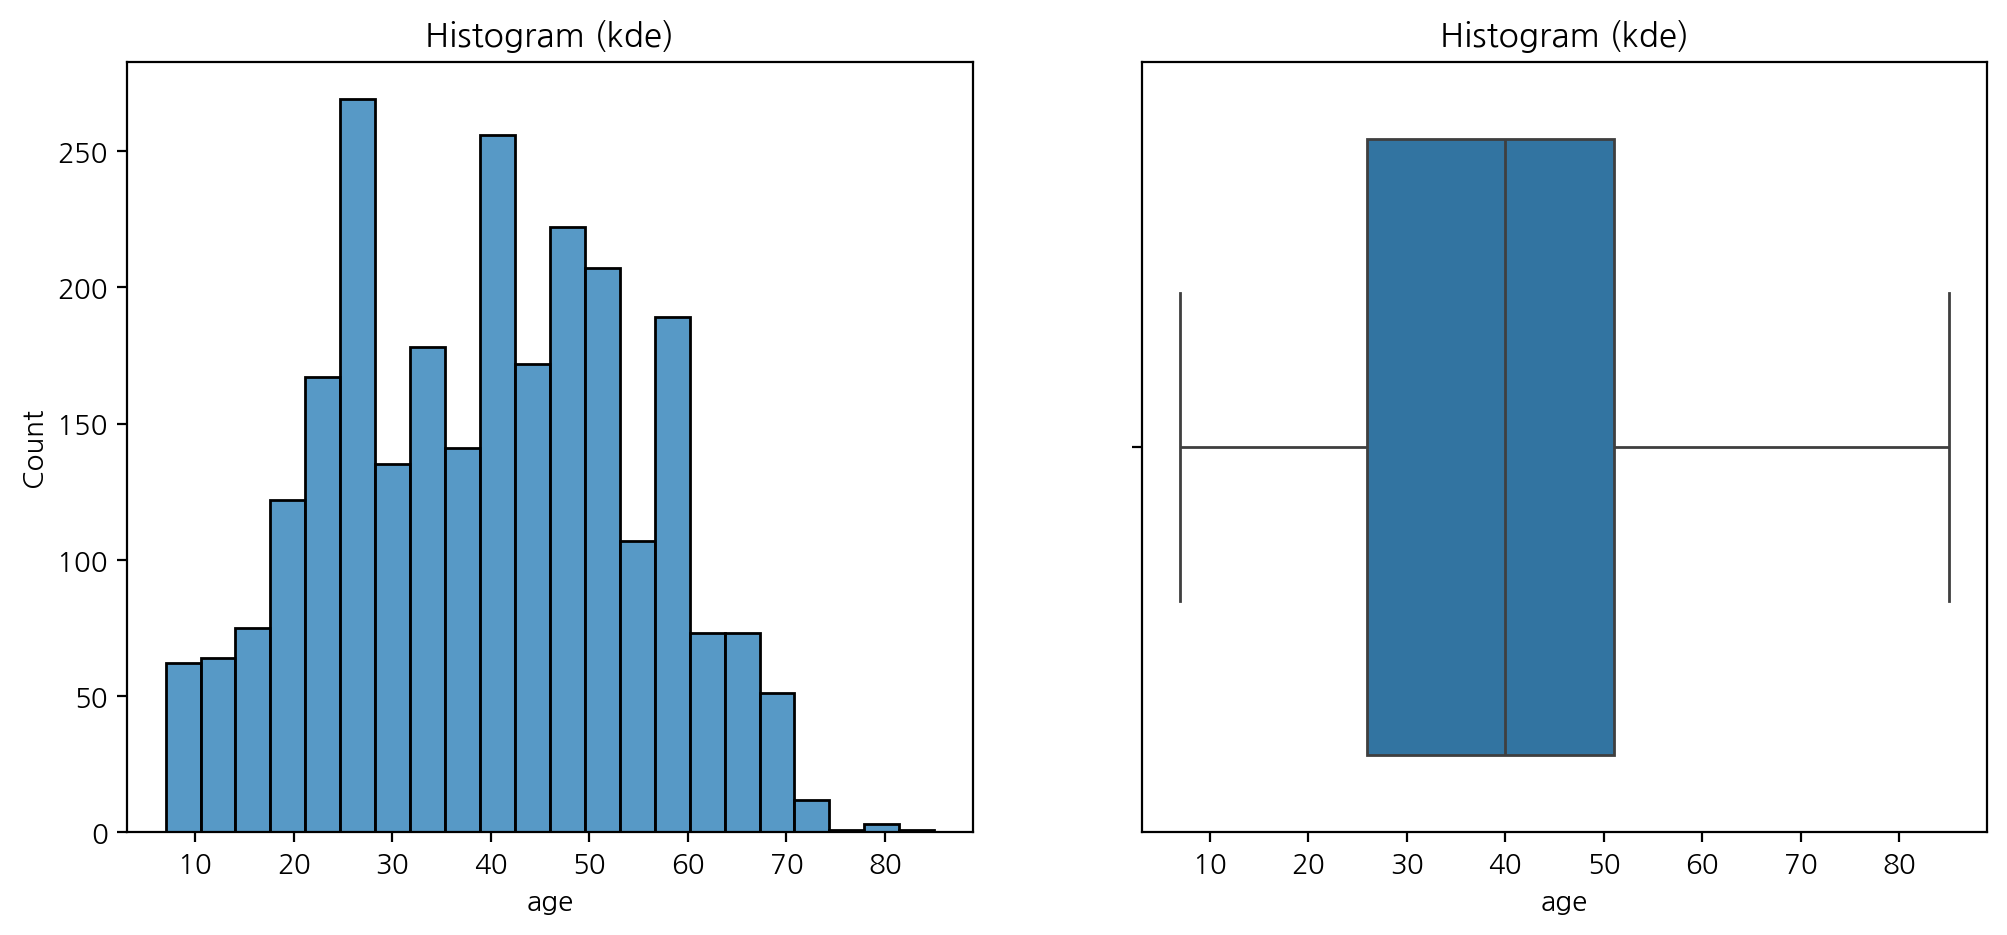

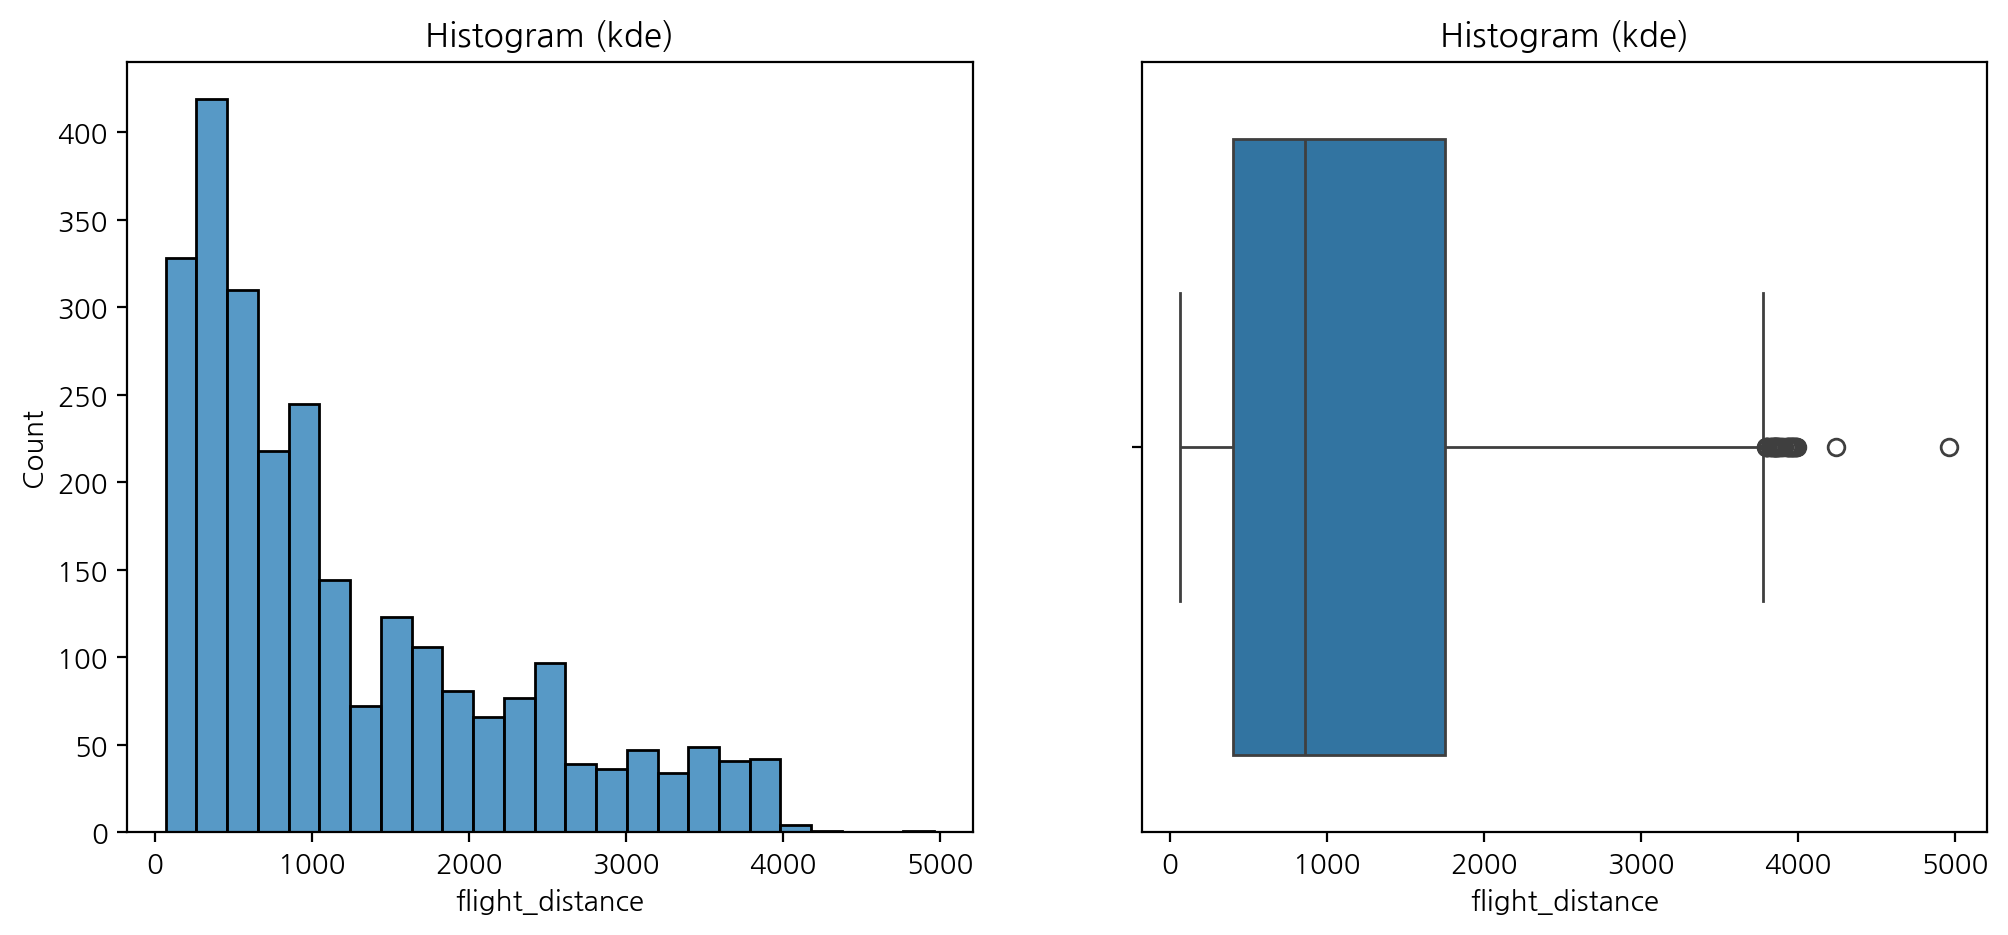

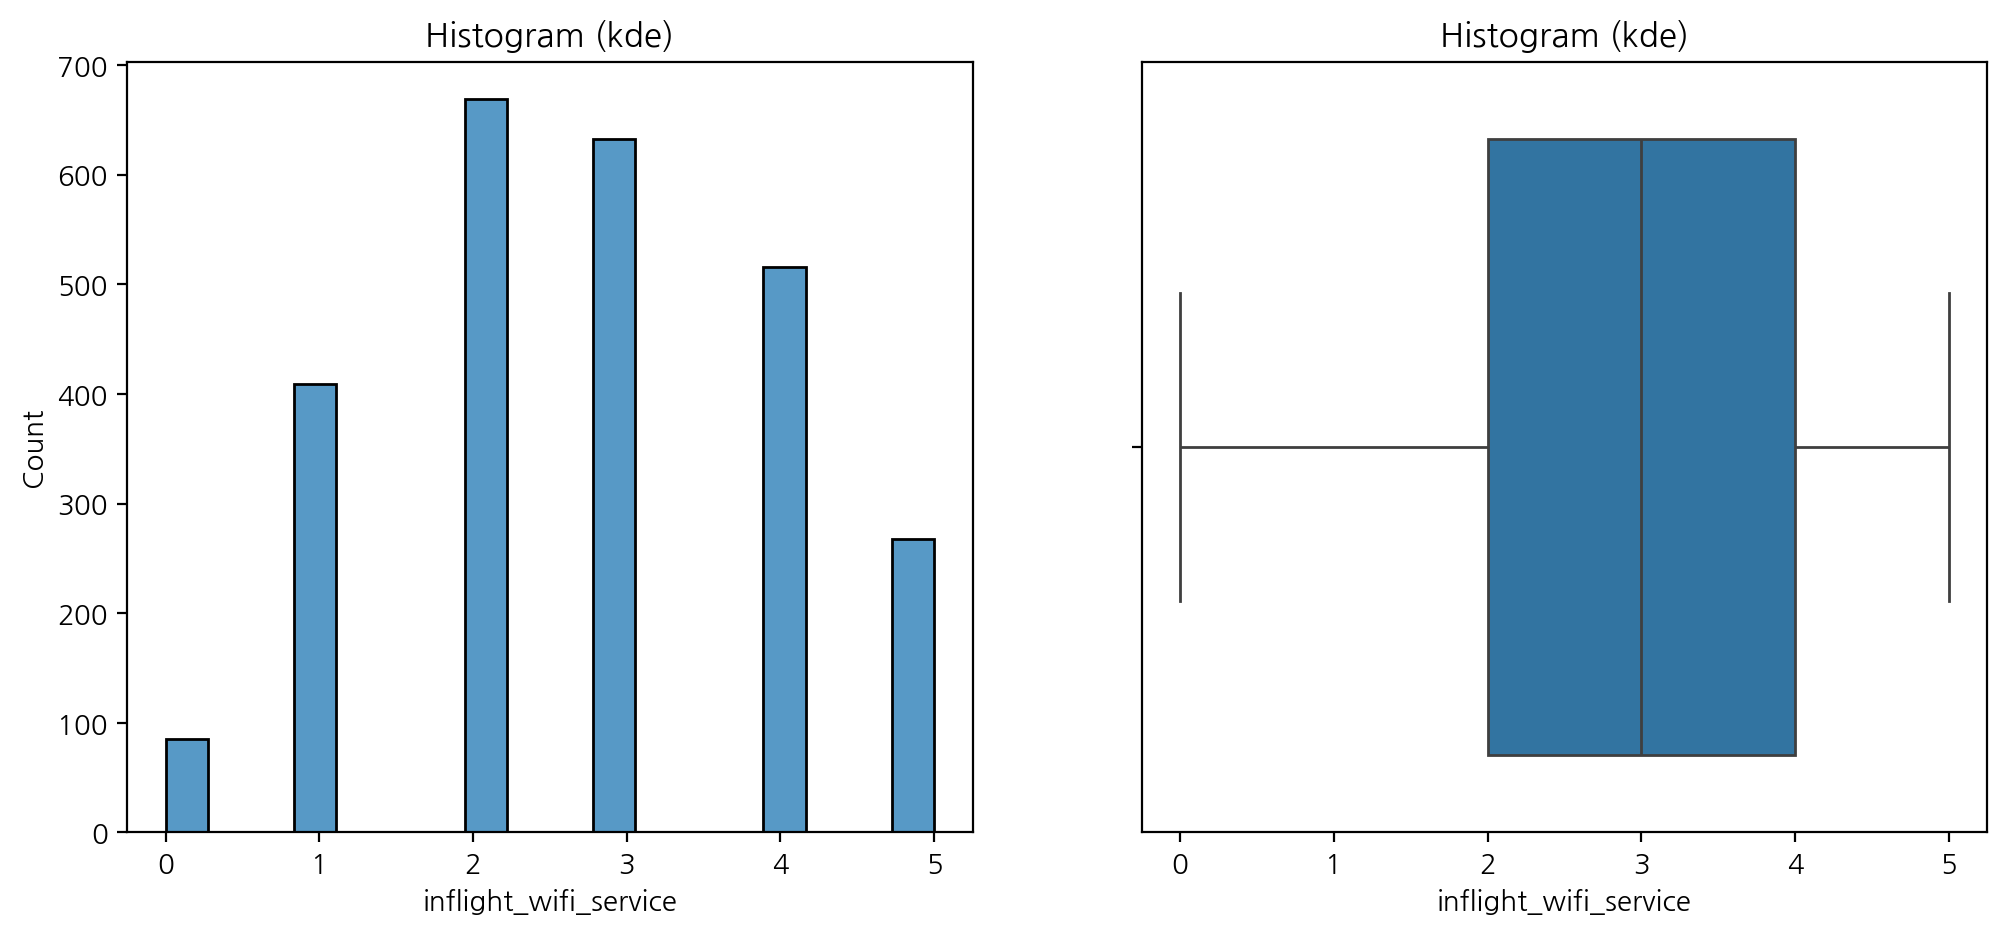

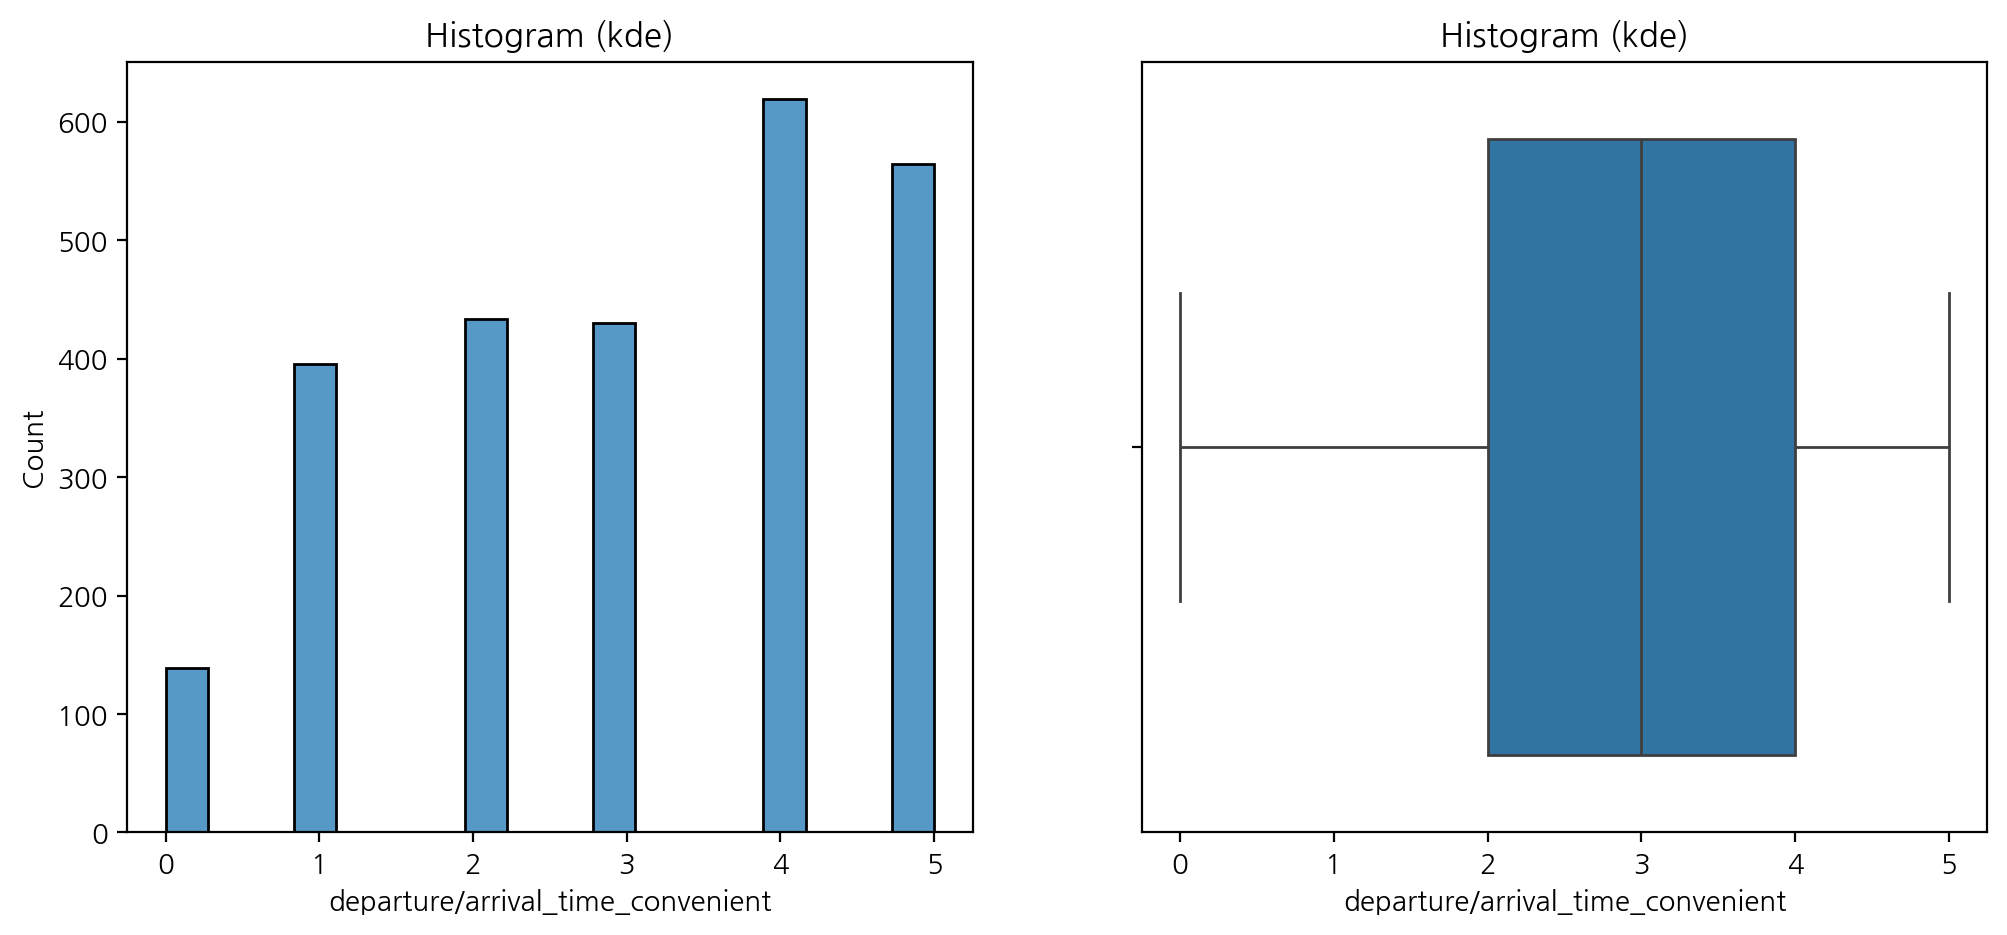

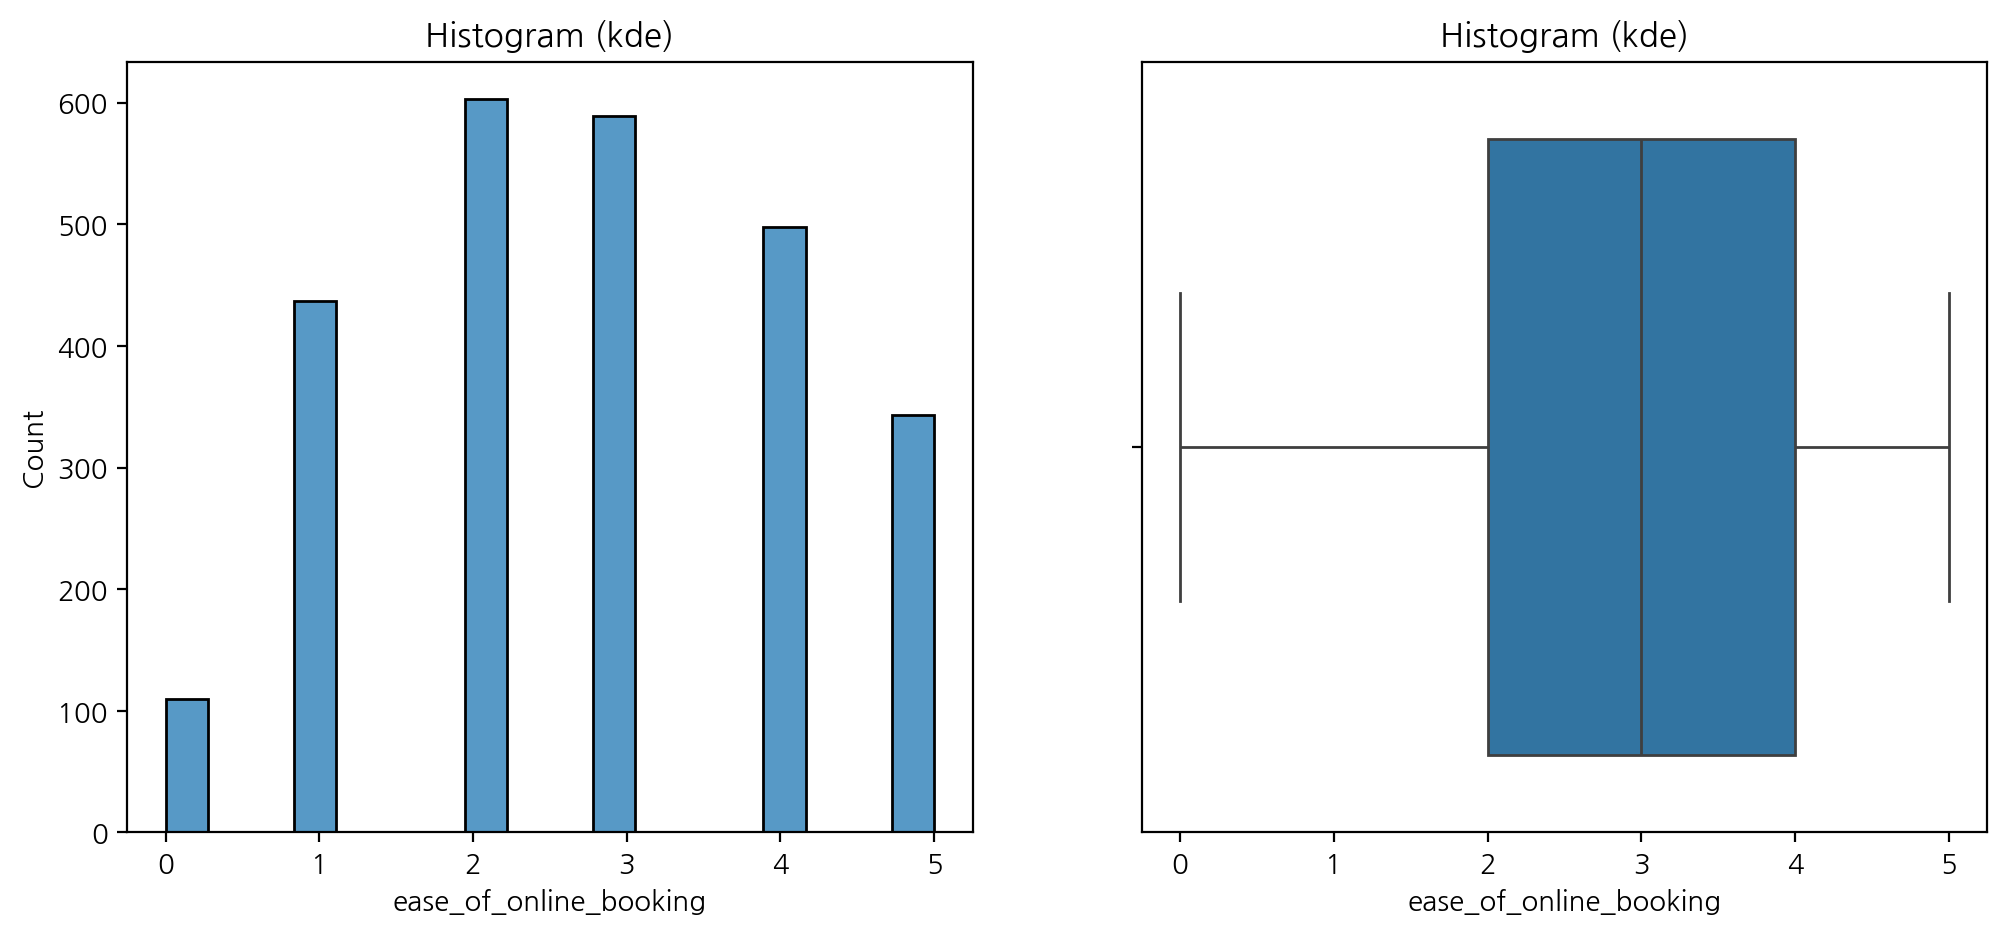

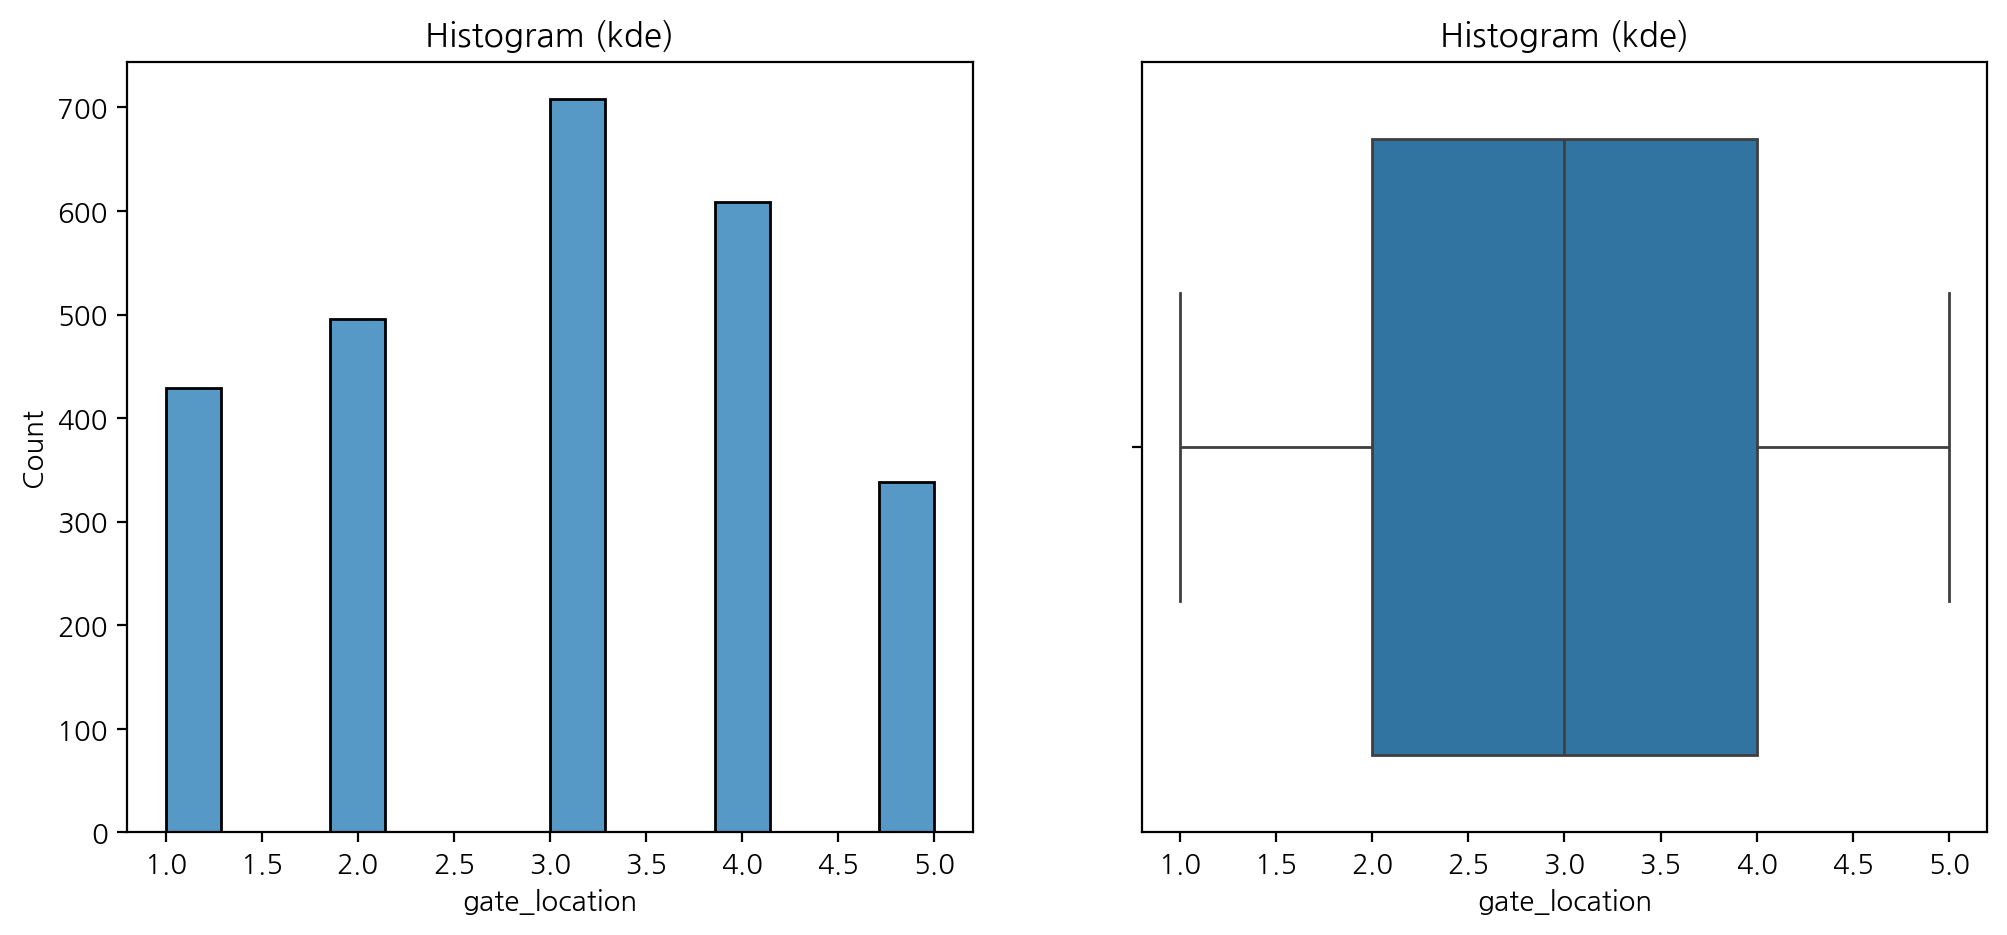

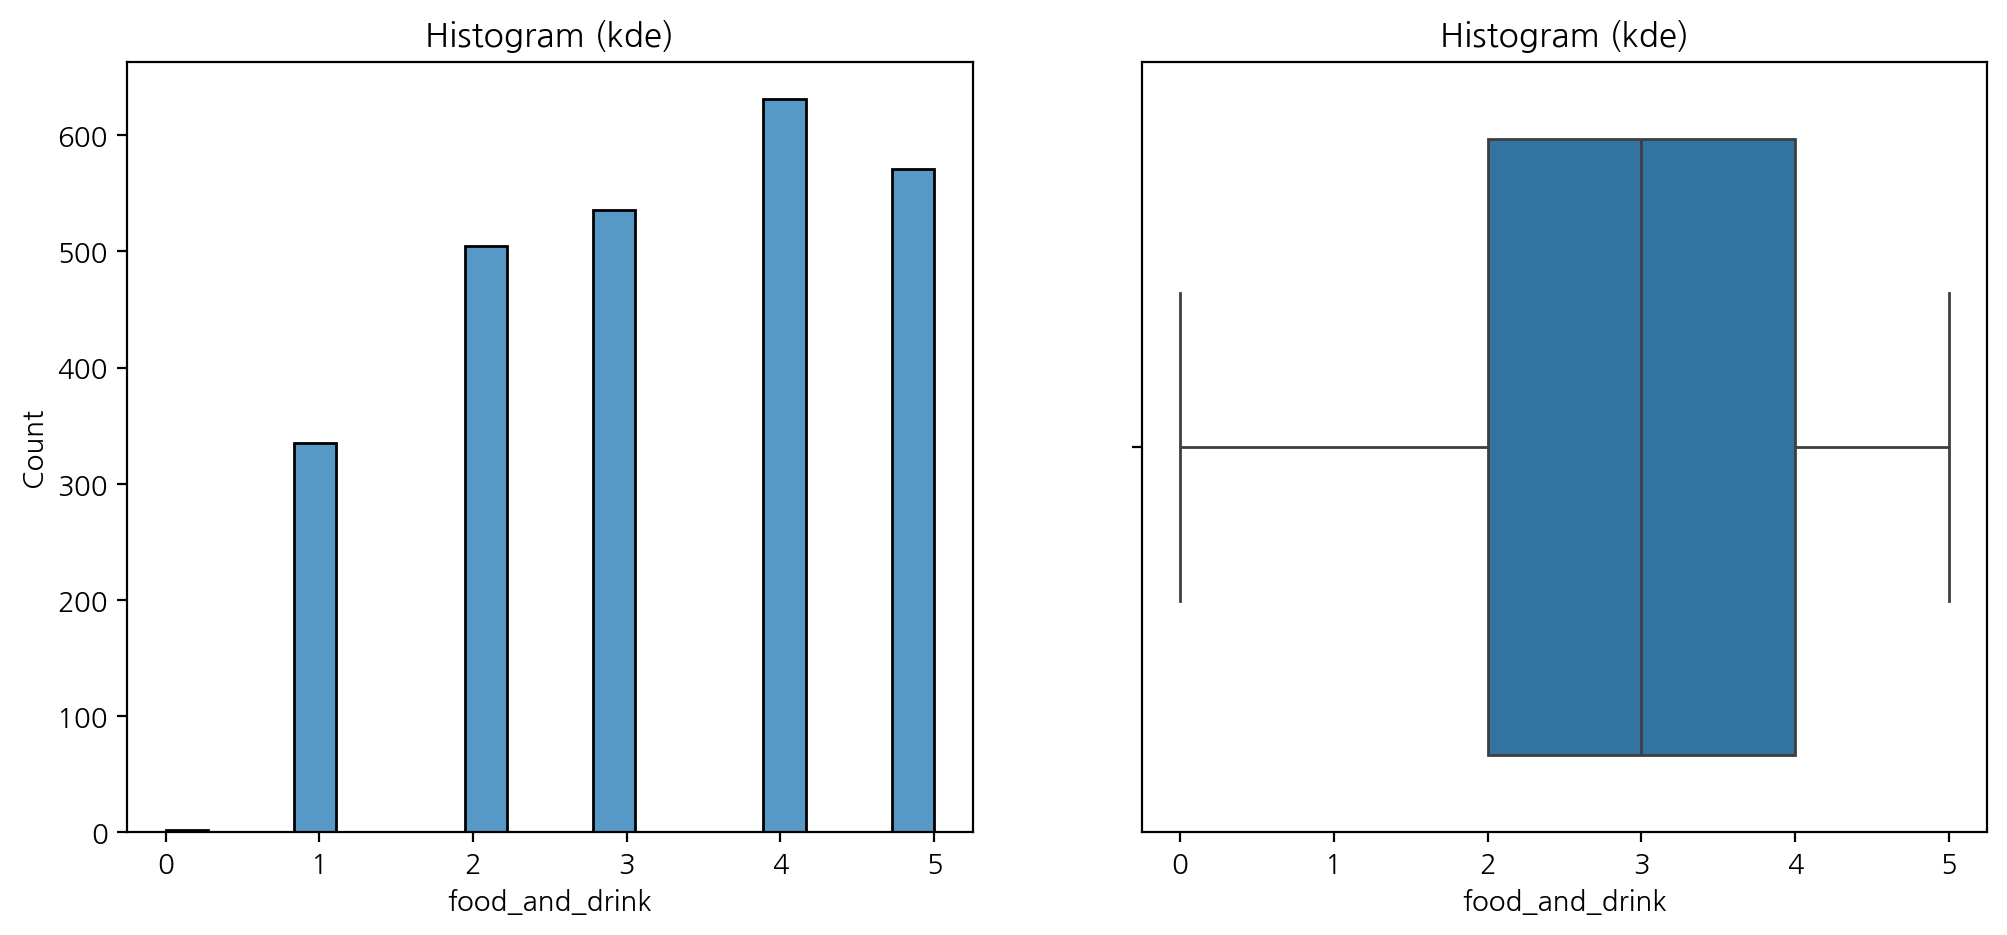

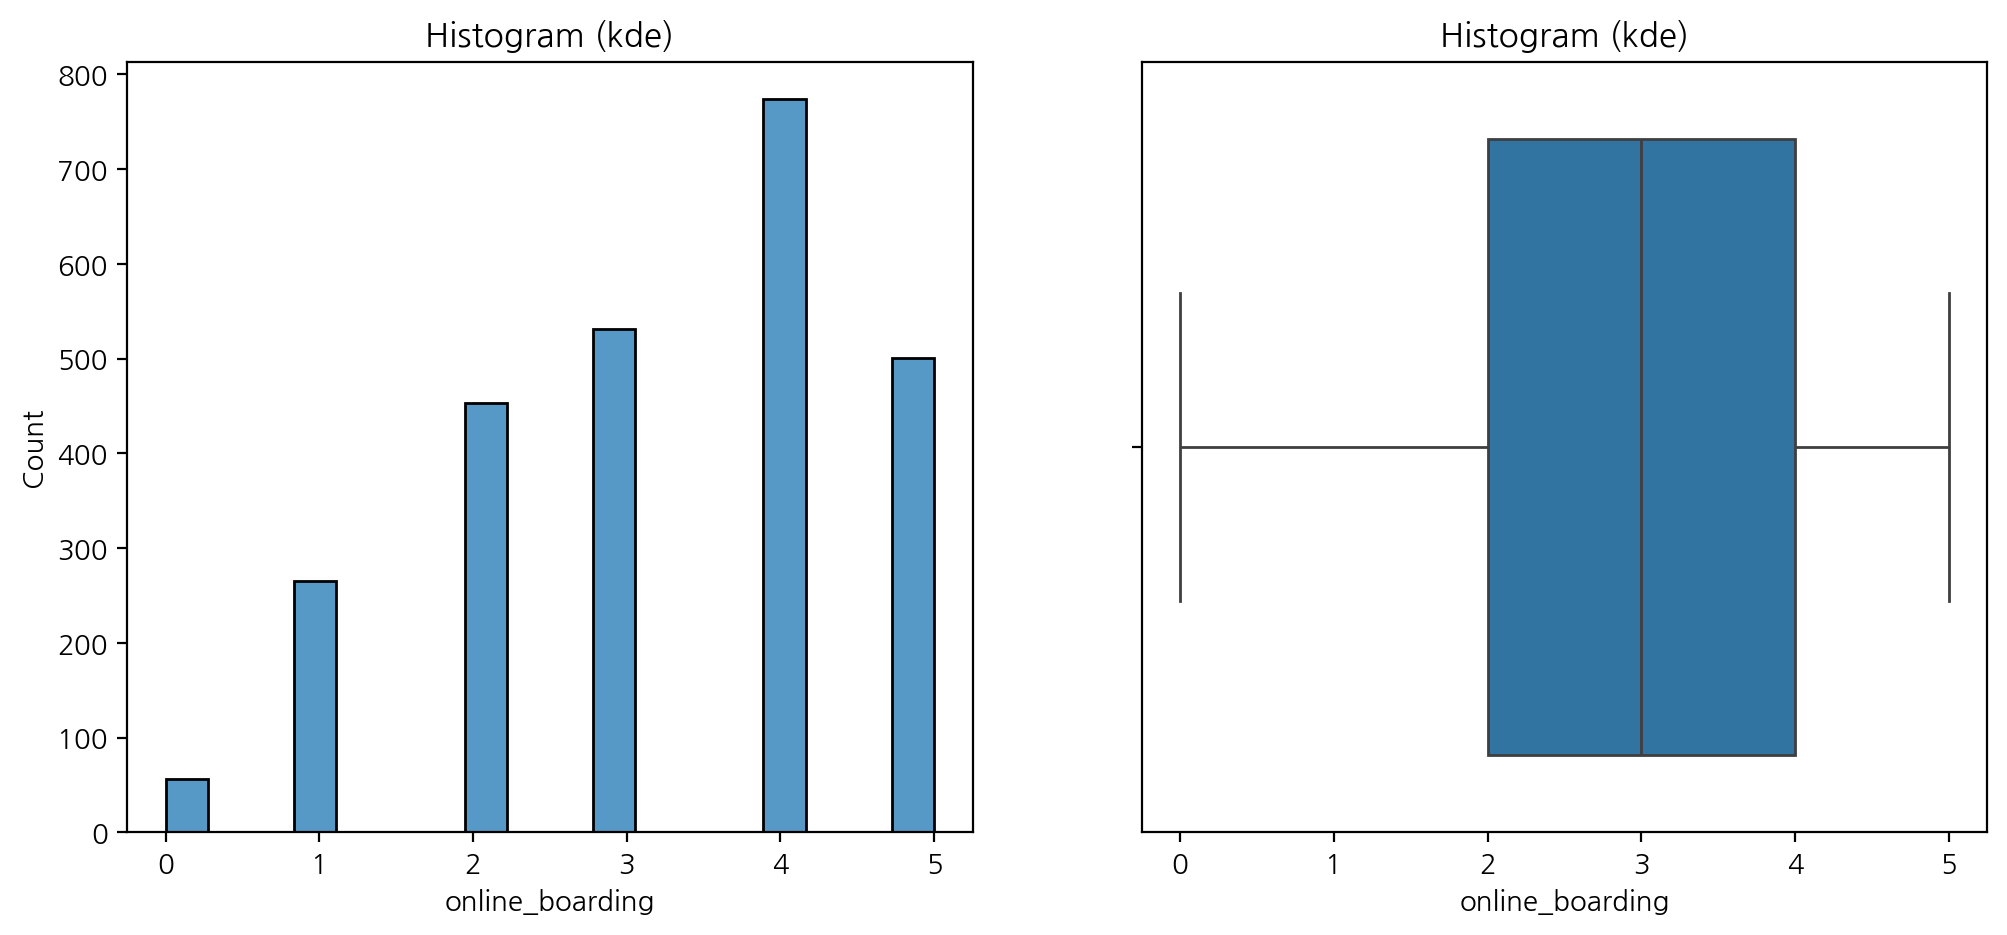

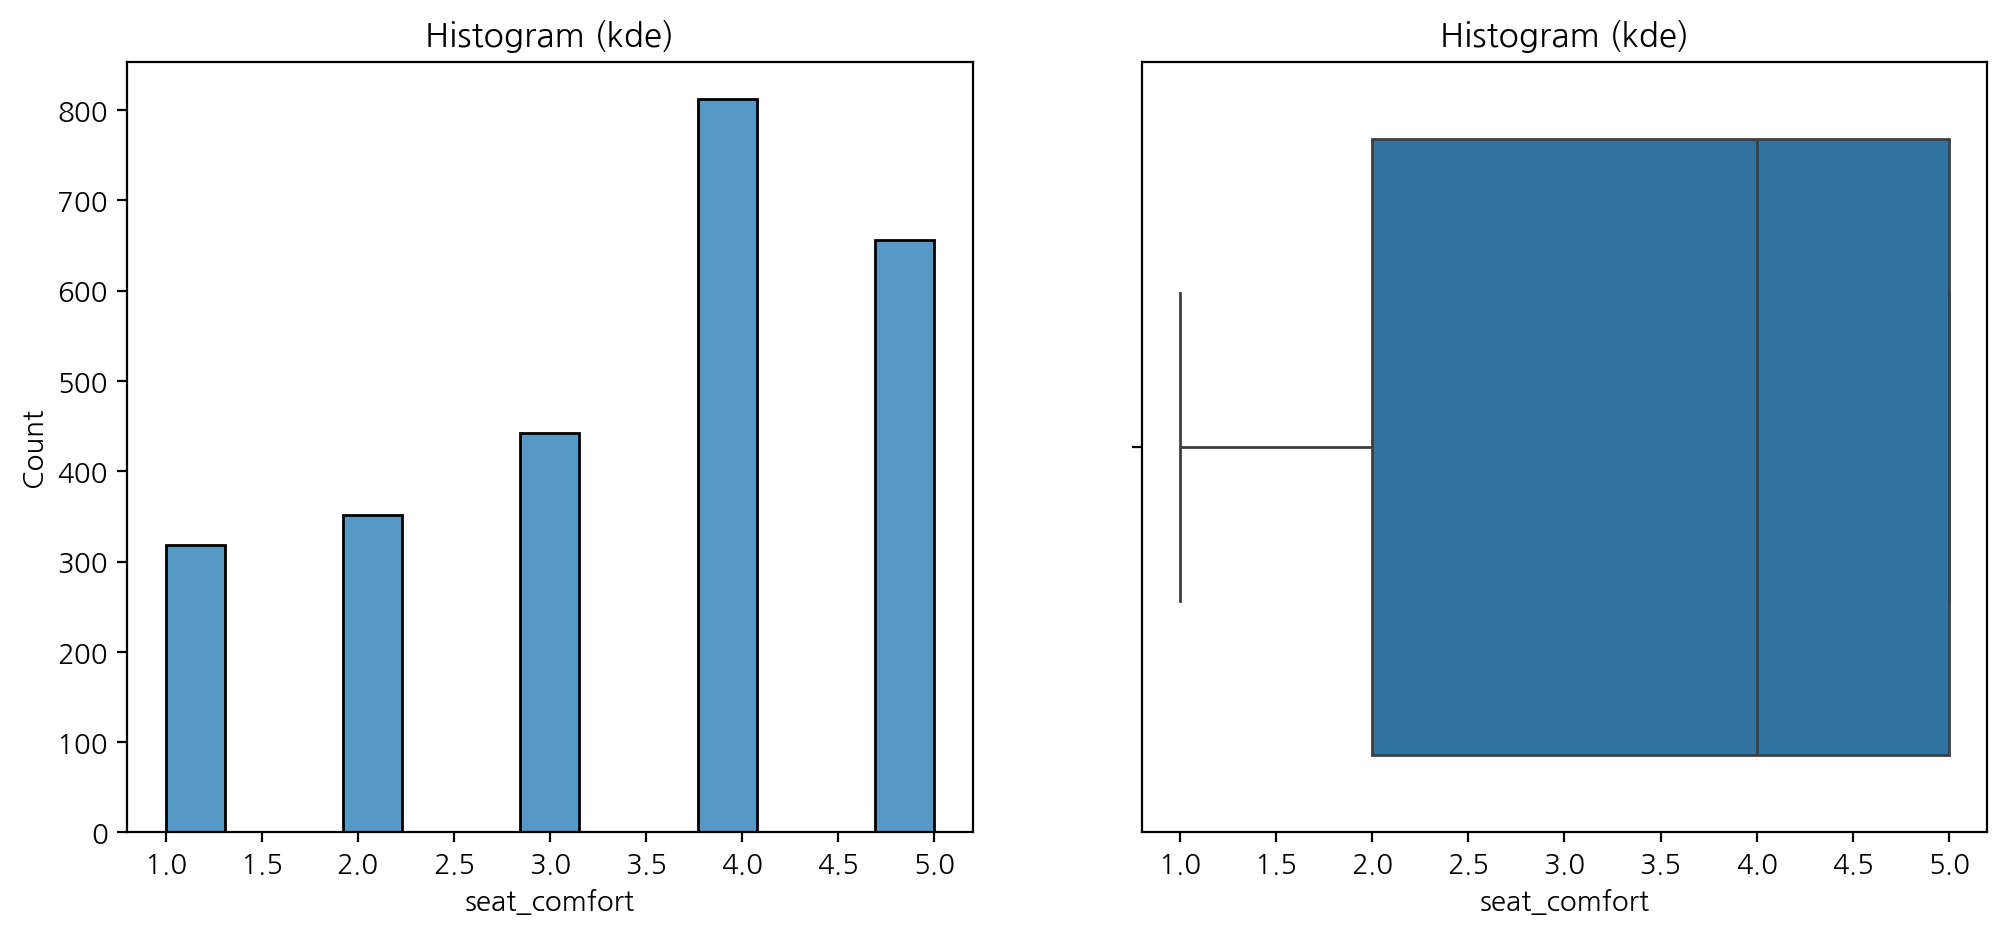

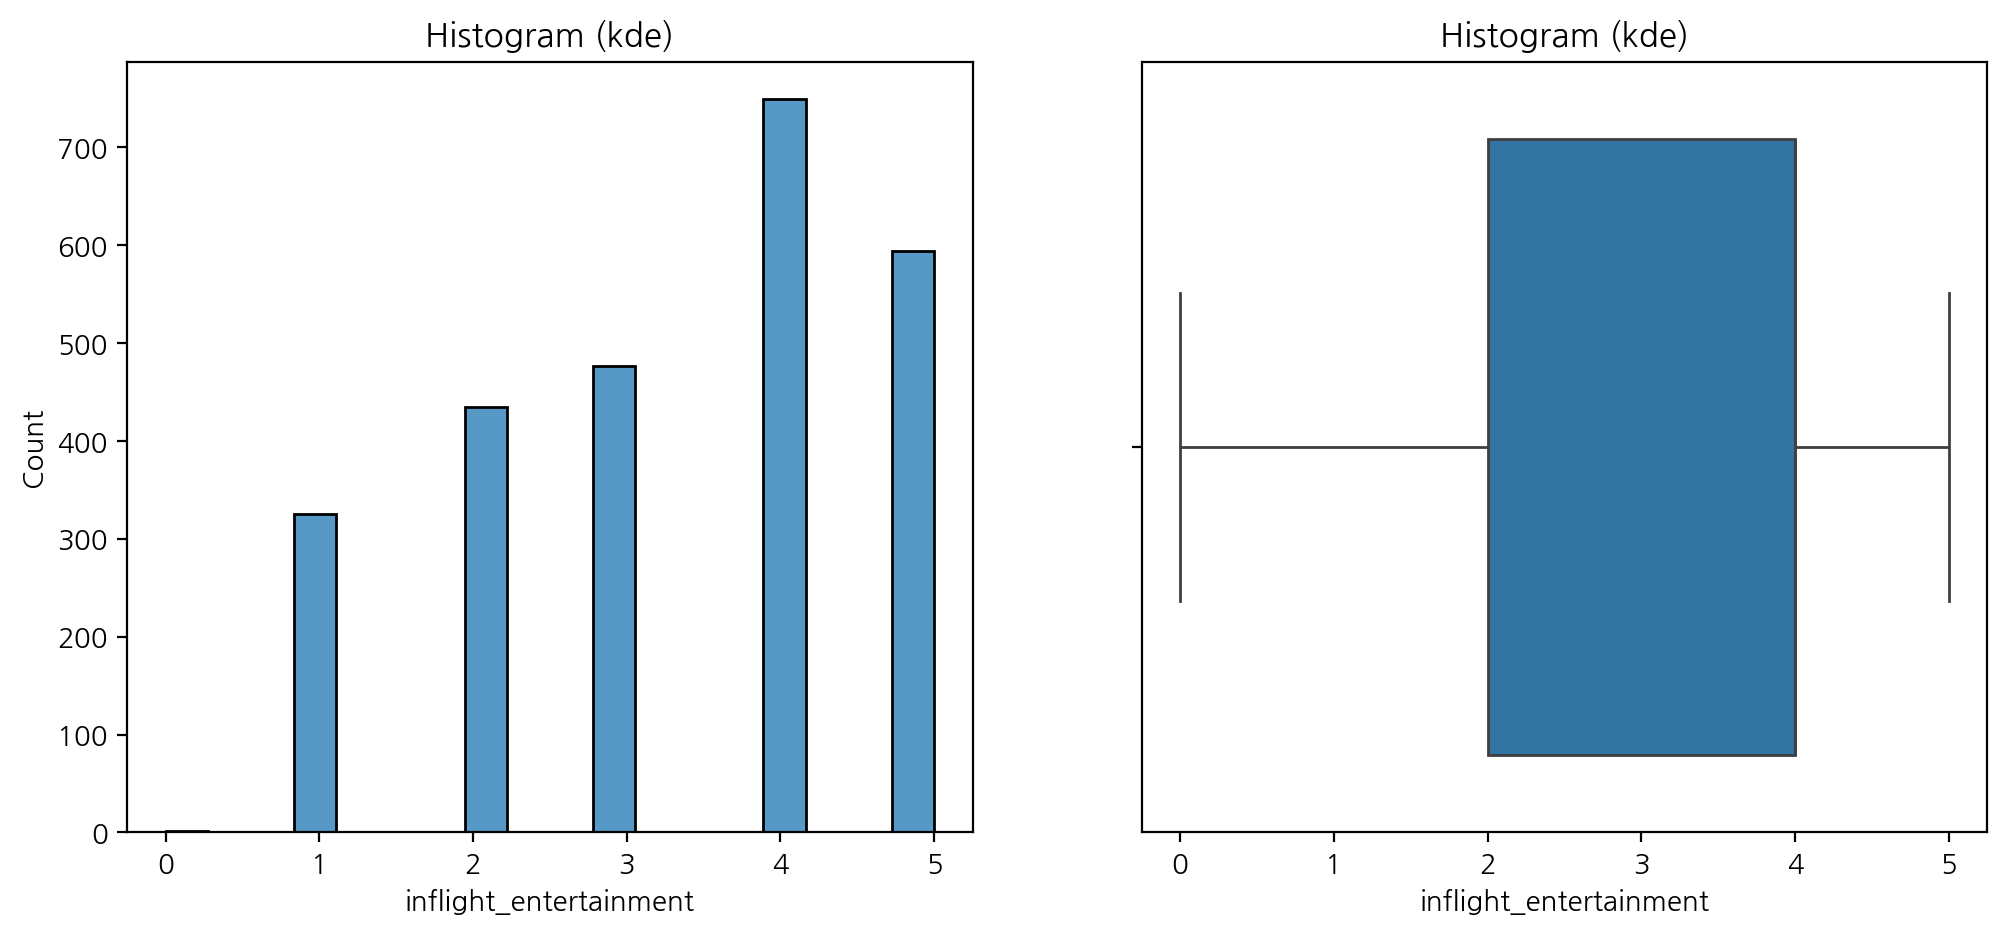

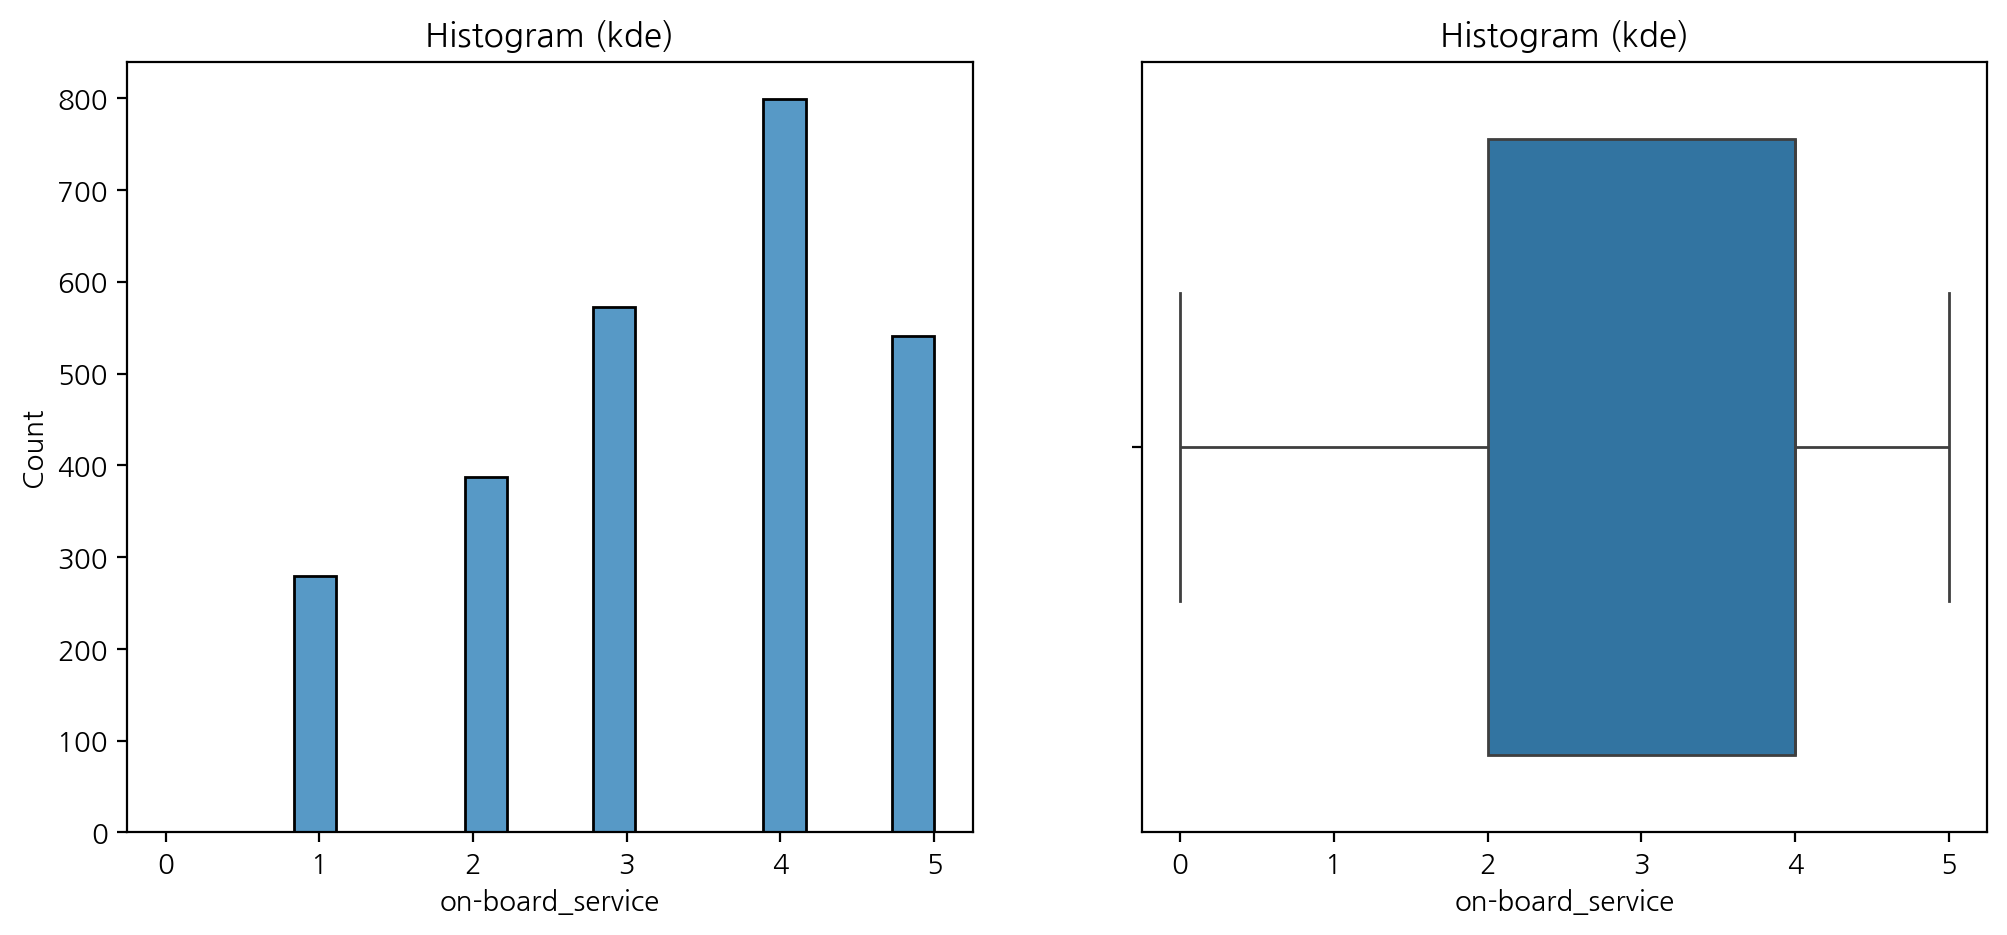

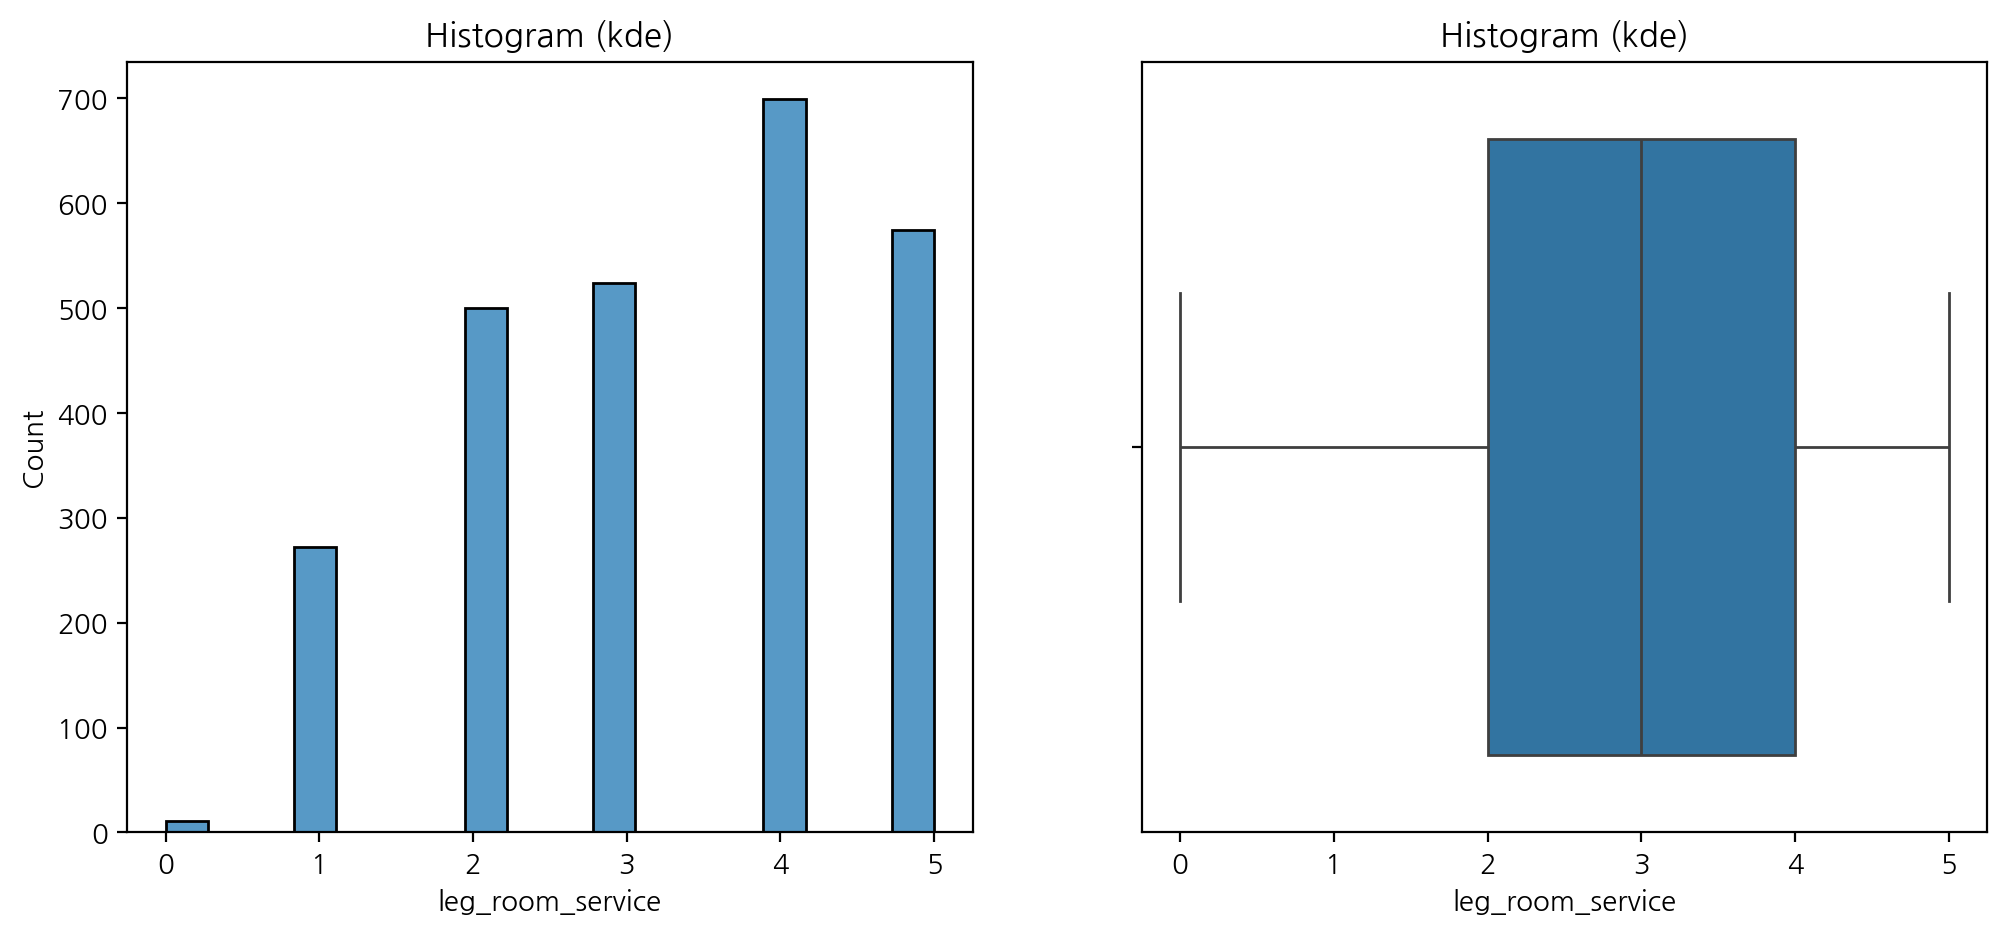

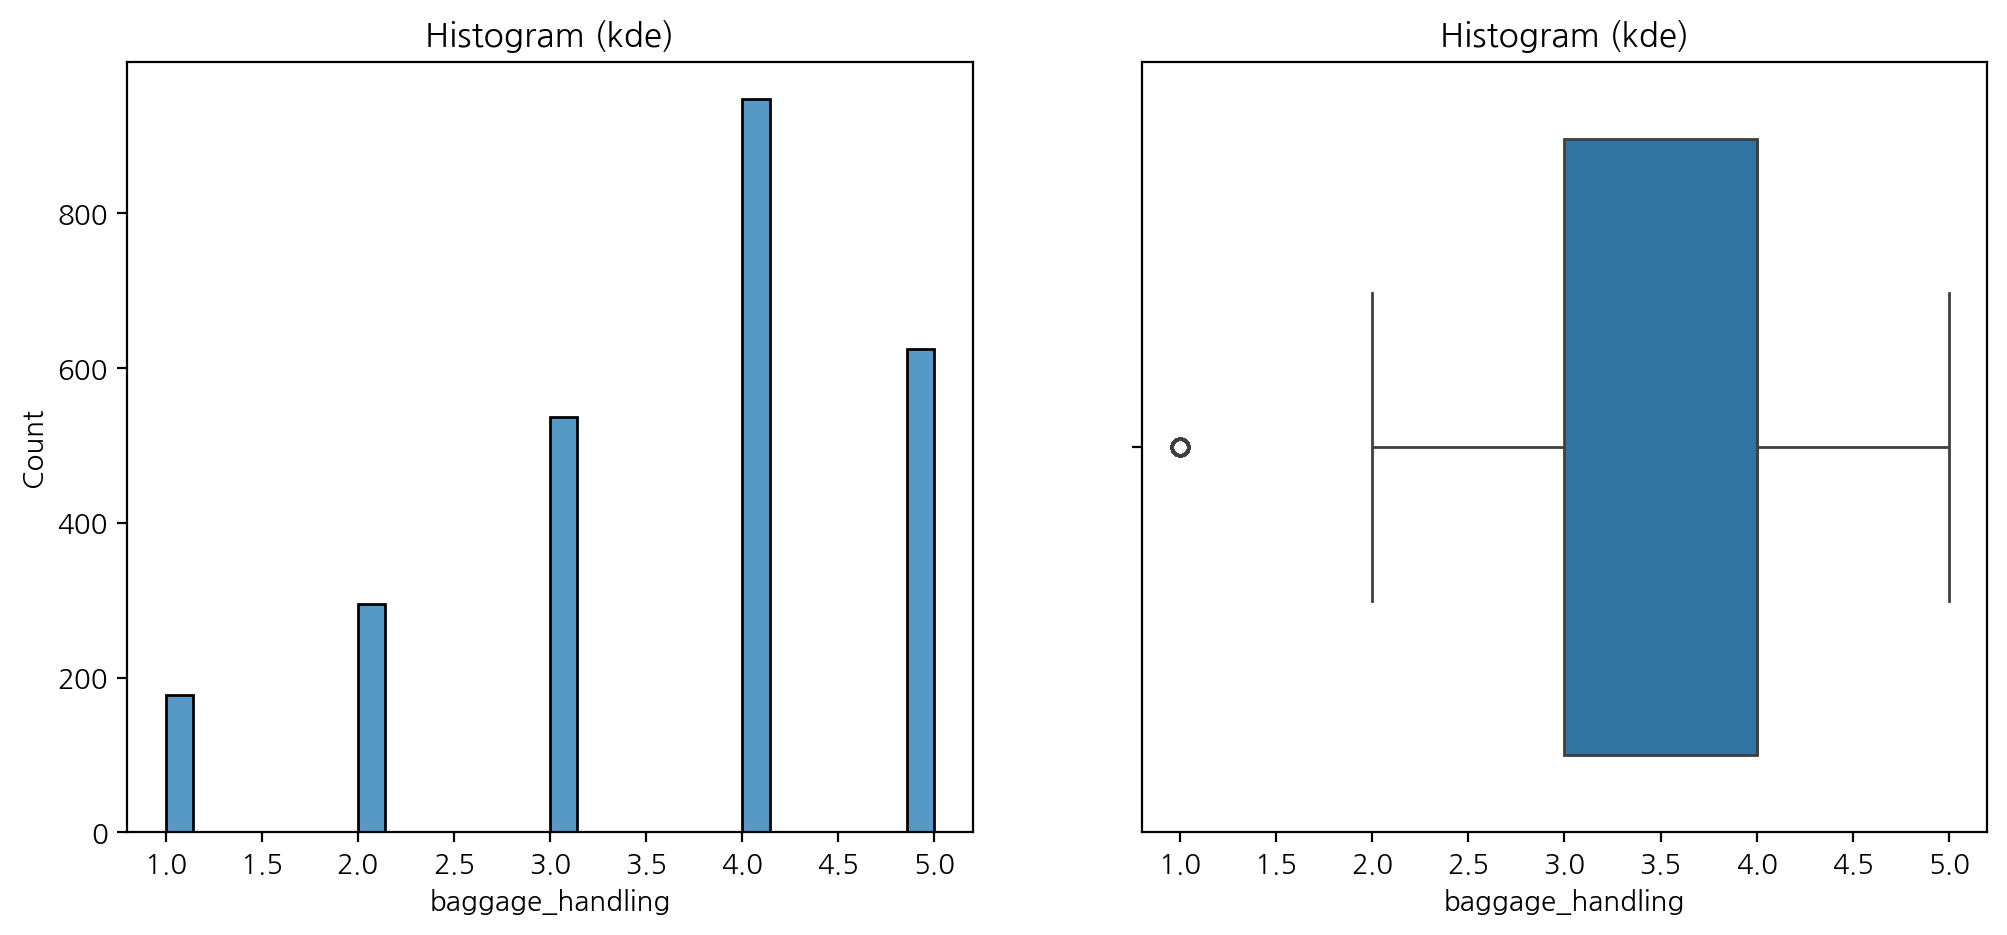

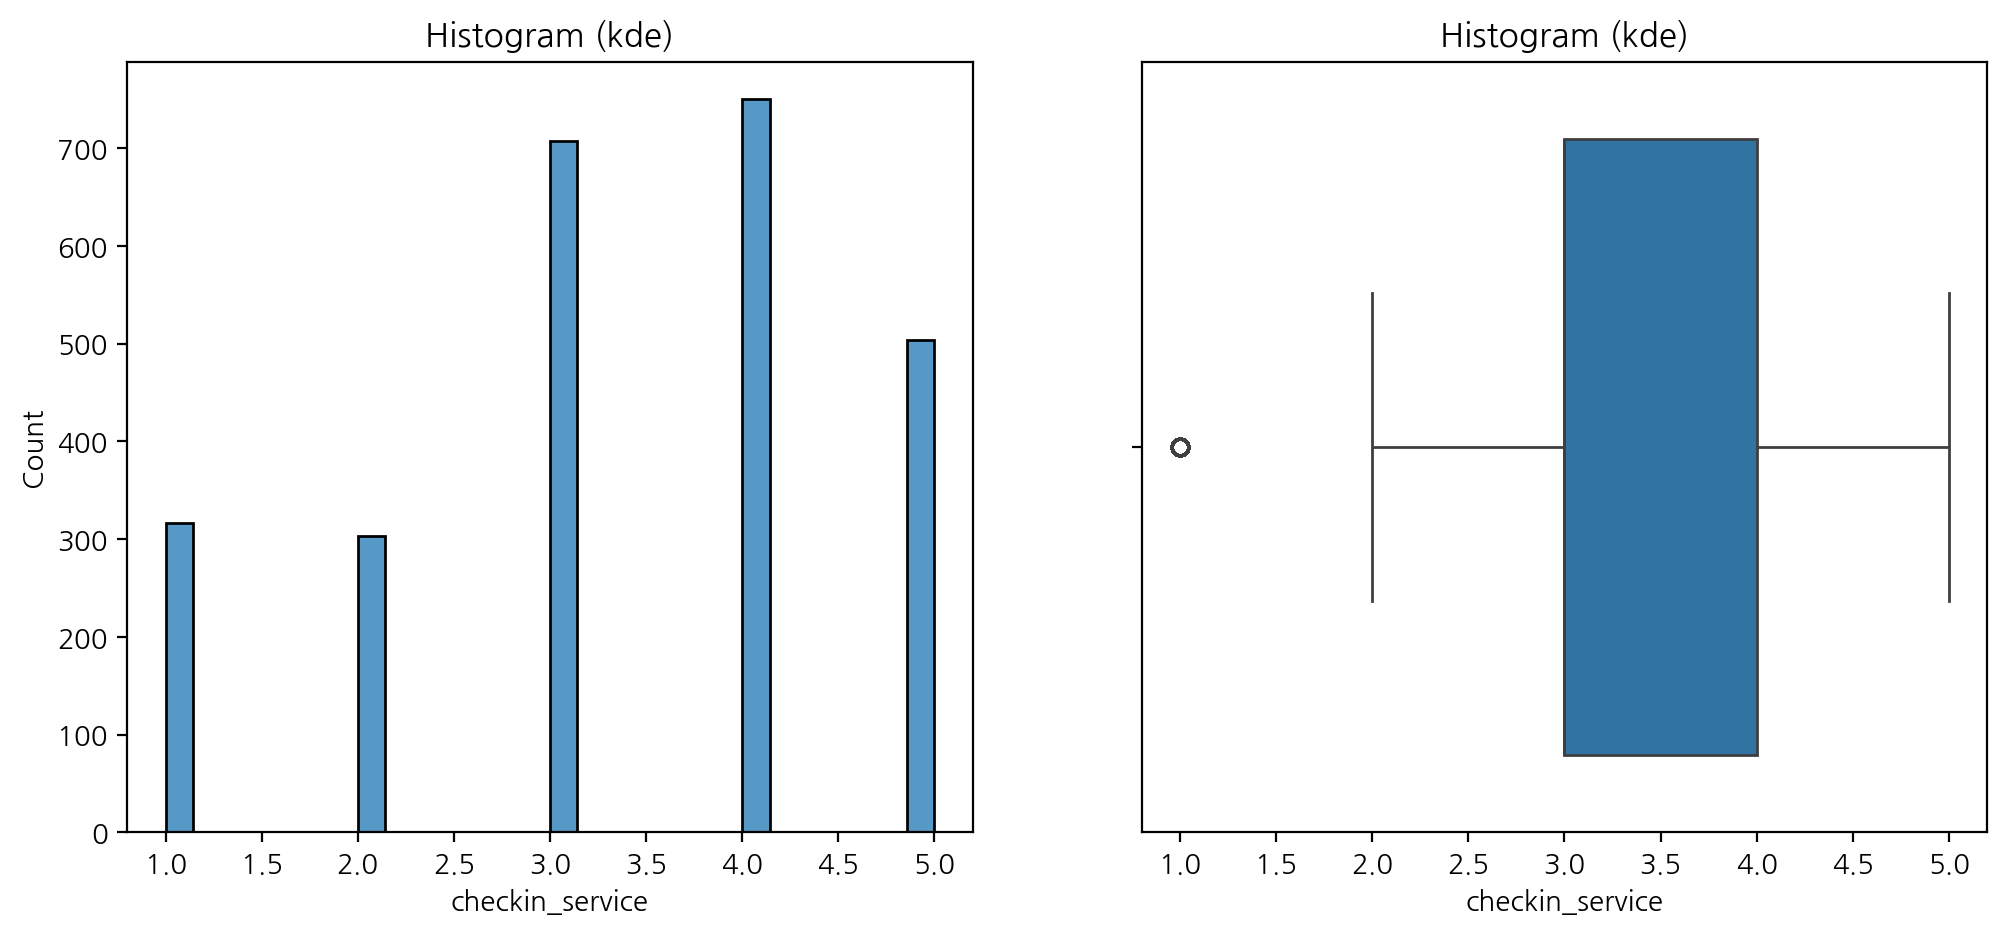

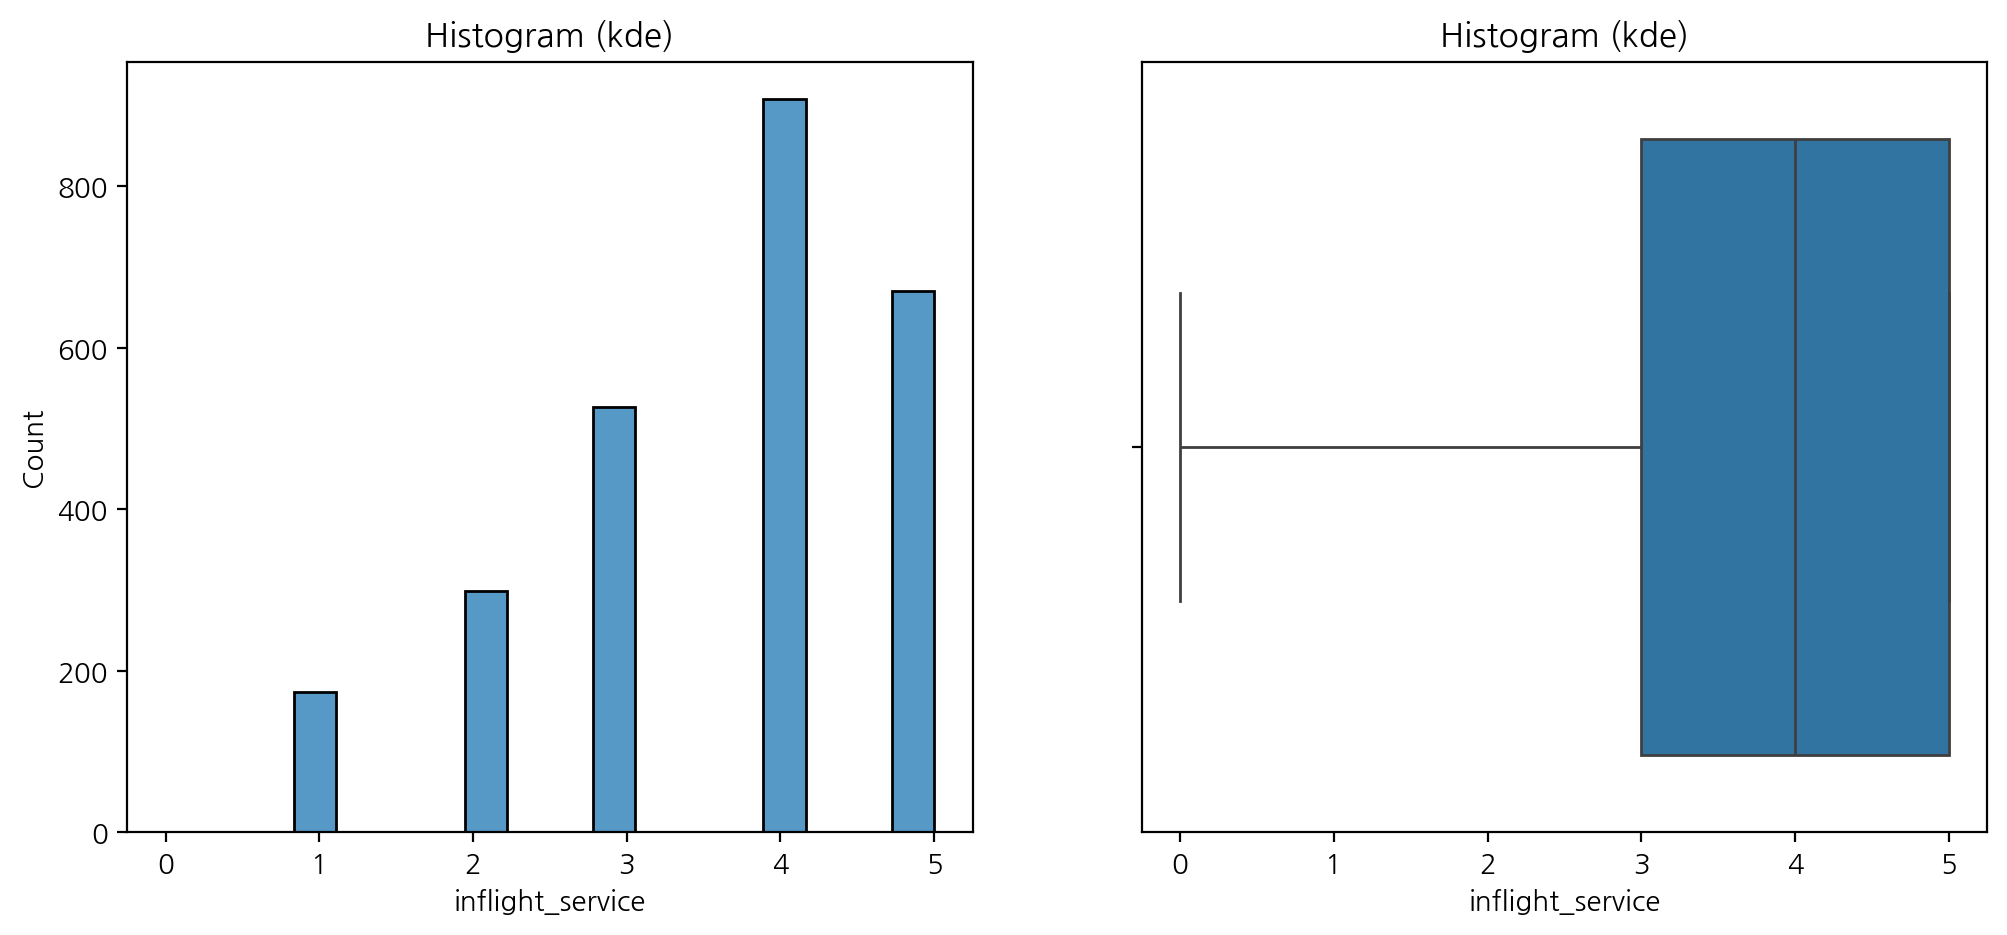

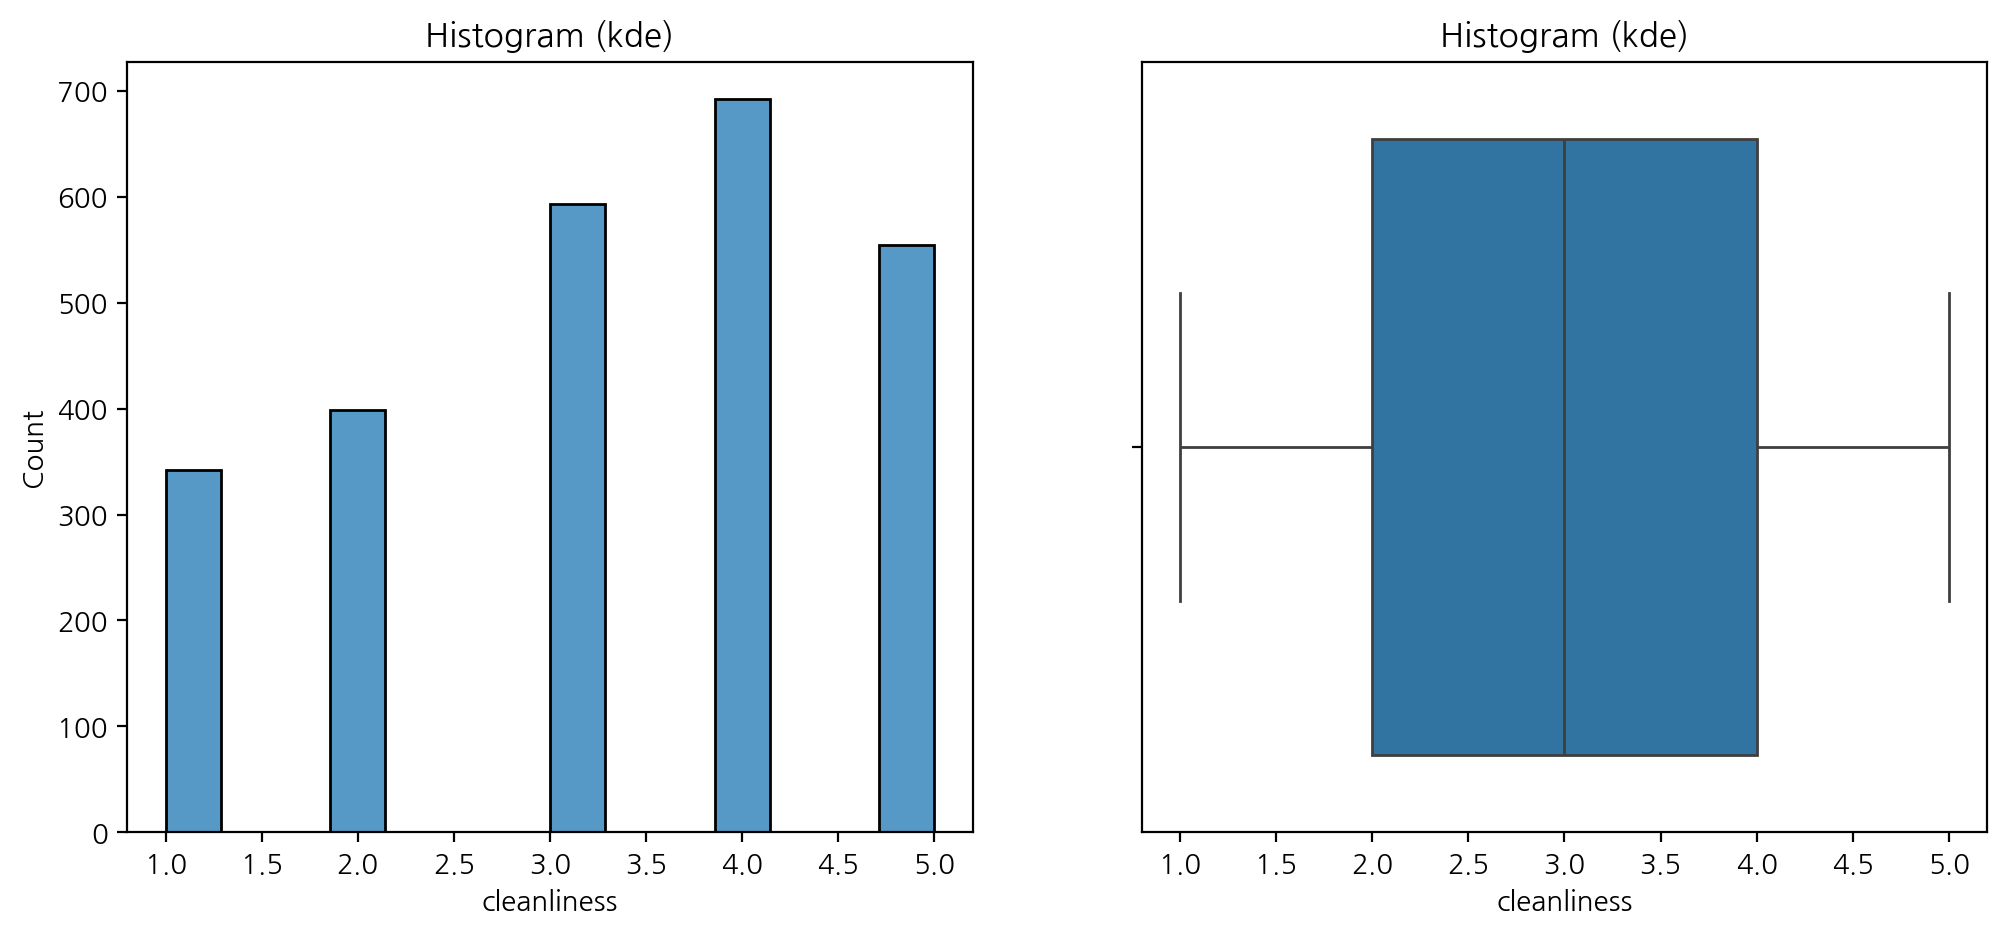

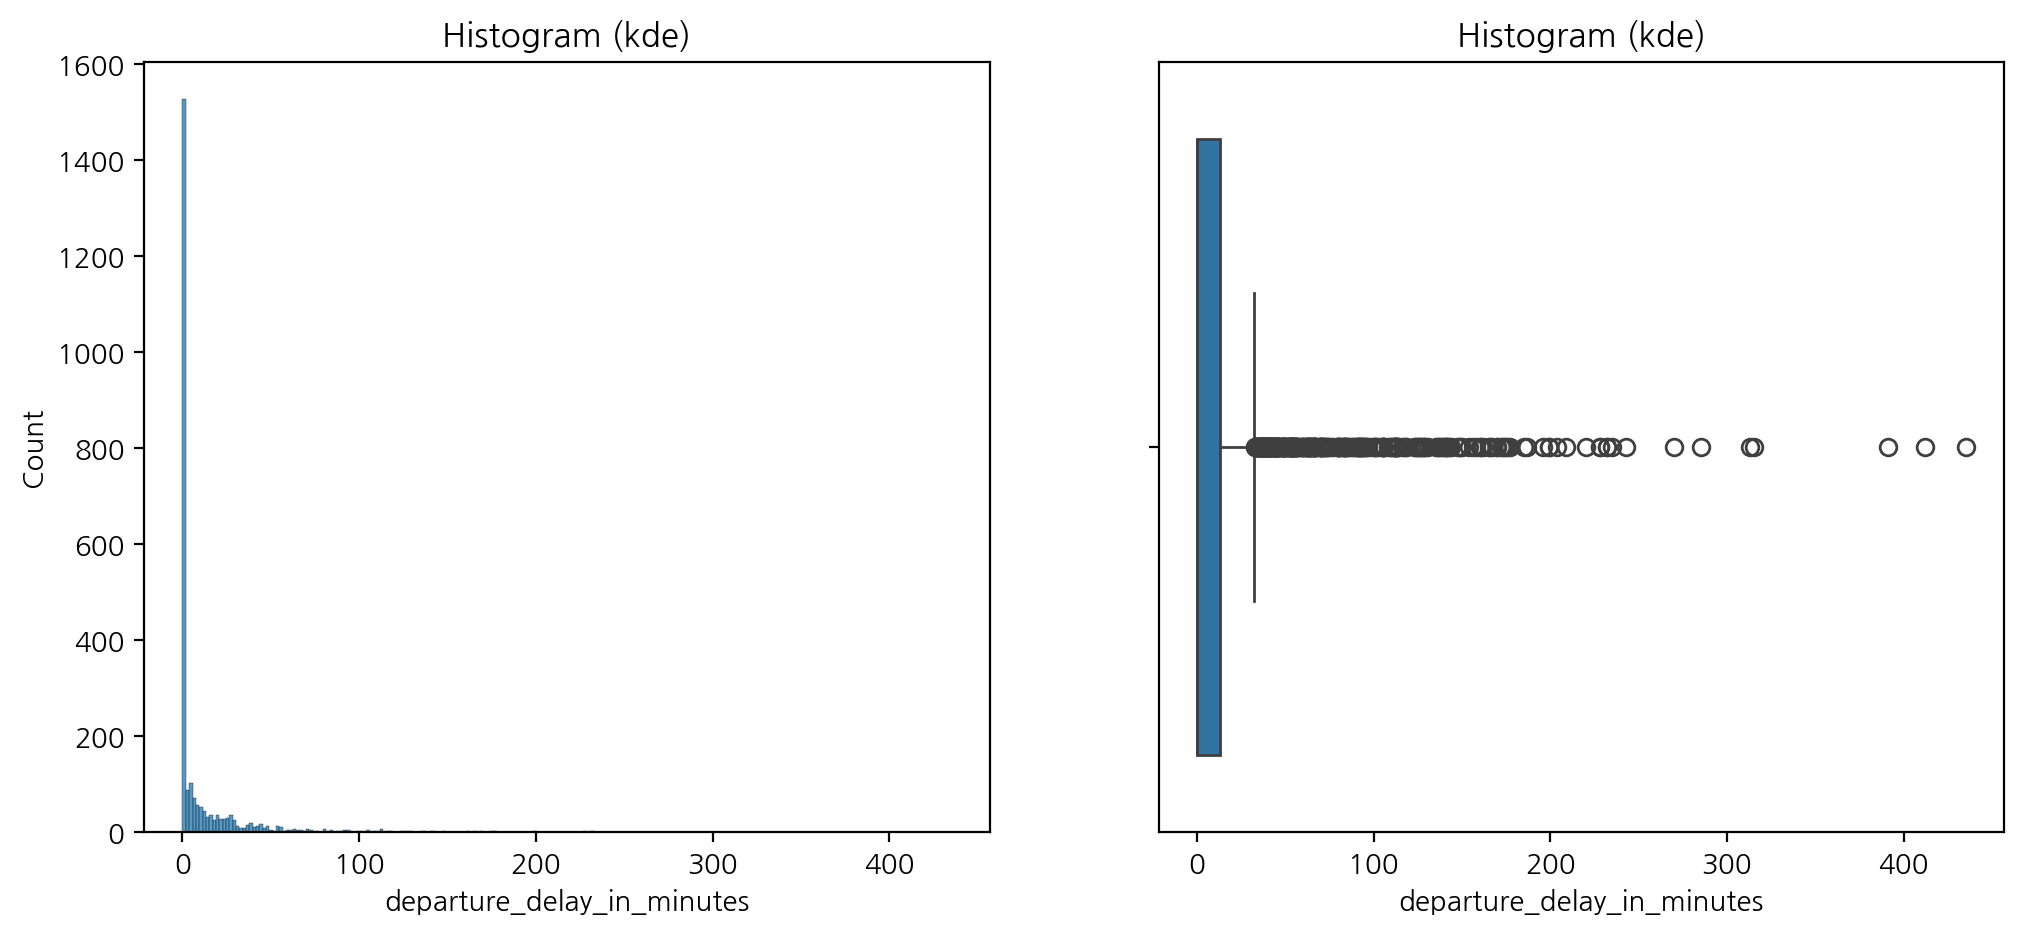

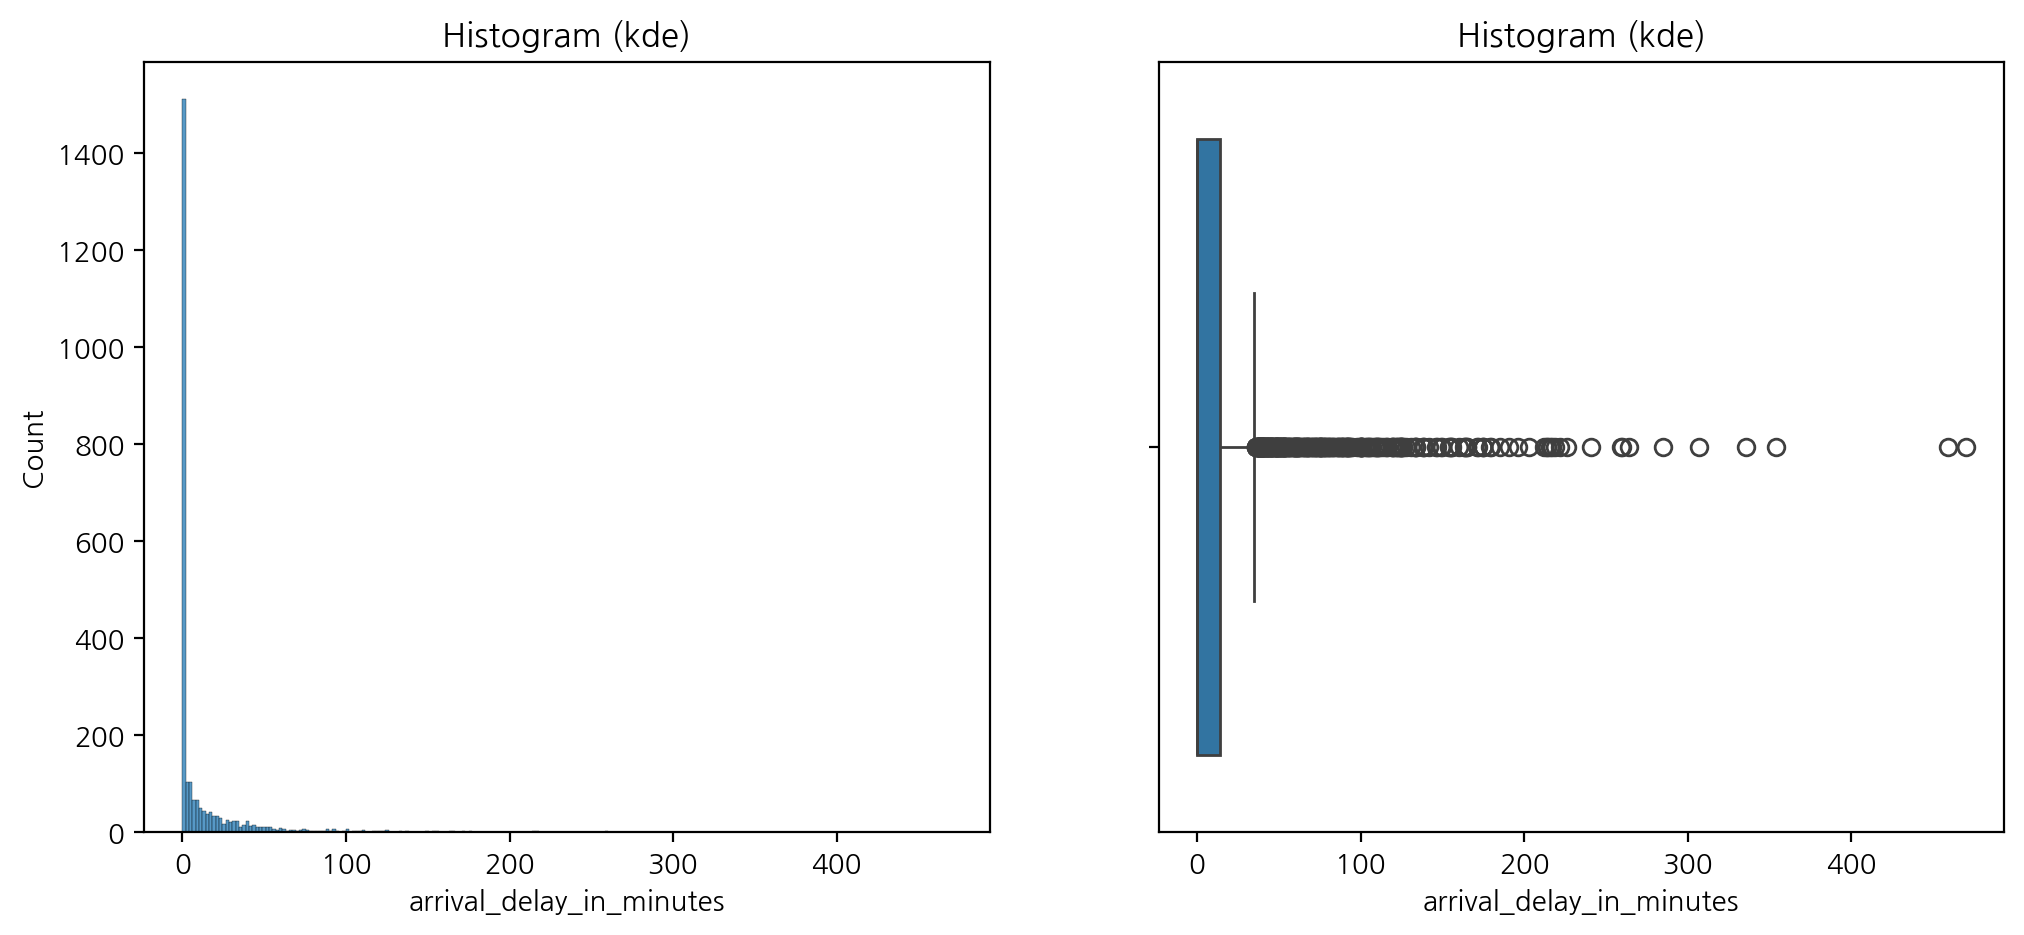

In [74]:
for i in numeric_columns:
    if i=='id' or i==target:
        continue
    univariate_analysis(data,i)

In [75]:
# 지연시간이 전반적으로 크게 치우친 시간대가 몇 있음. 이상치라 보아도 되긴하는데, 어차피 꼬리도 길고해서 정규화 하면 괜찮아보임.


In [76]:
data['arrival_delay_in_minutes'].value_counts()
# 보면 대다수는 지연시간이 없음.
# 애초에 지연이 많이 안되니까 bar plot에 그려진 모든 경우가 특수한 경우임
# 만족도에 높은 영향을 줄것으로 판단되기에, 저 차이를 꼭 들고갈것임.

arrival_delay_in_minutes
0.0      1409
4.0        55
6.0        52
2.0        51
1.0        51
         ... 
84.0        1
123.0       1
94.0        1
336.0       1
115.0       1
Name: count, Length: 161, dtype: int64

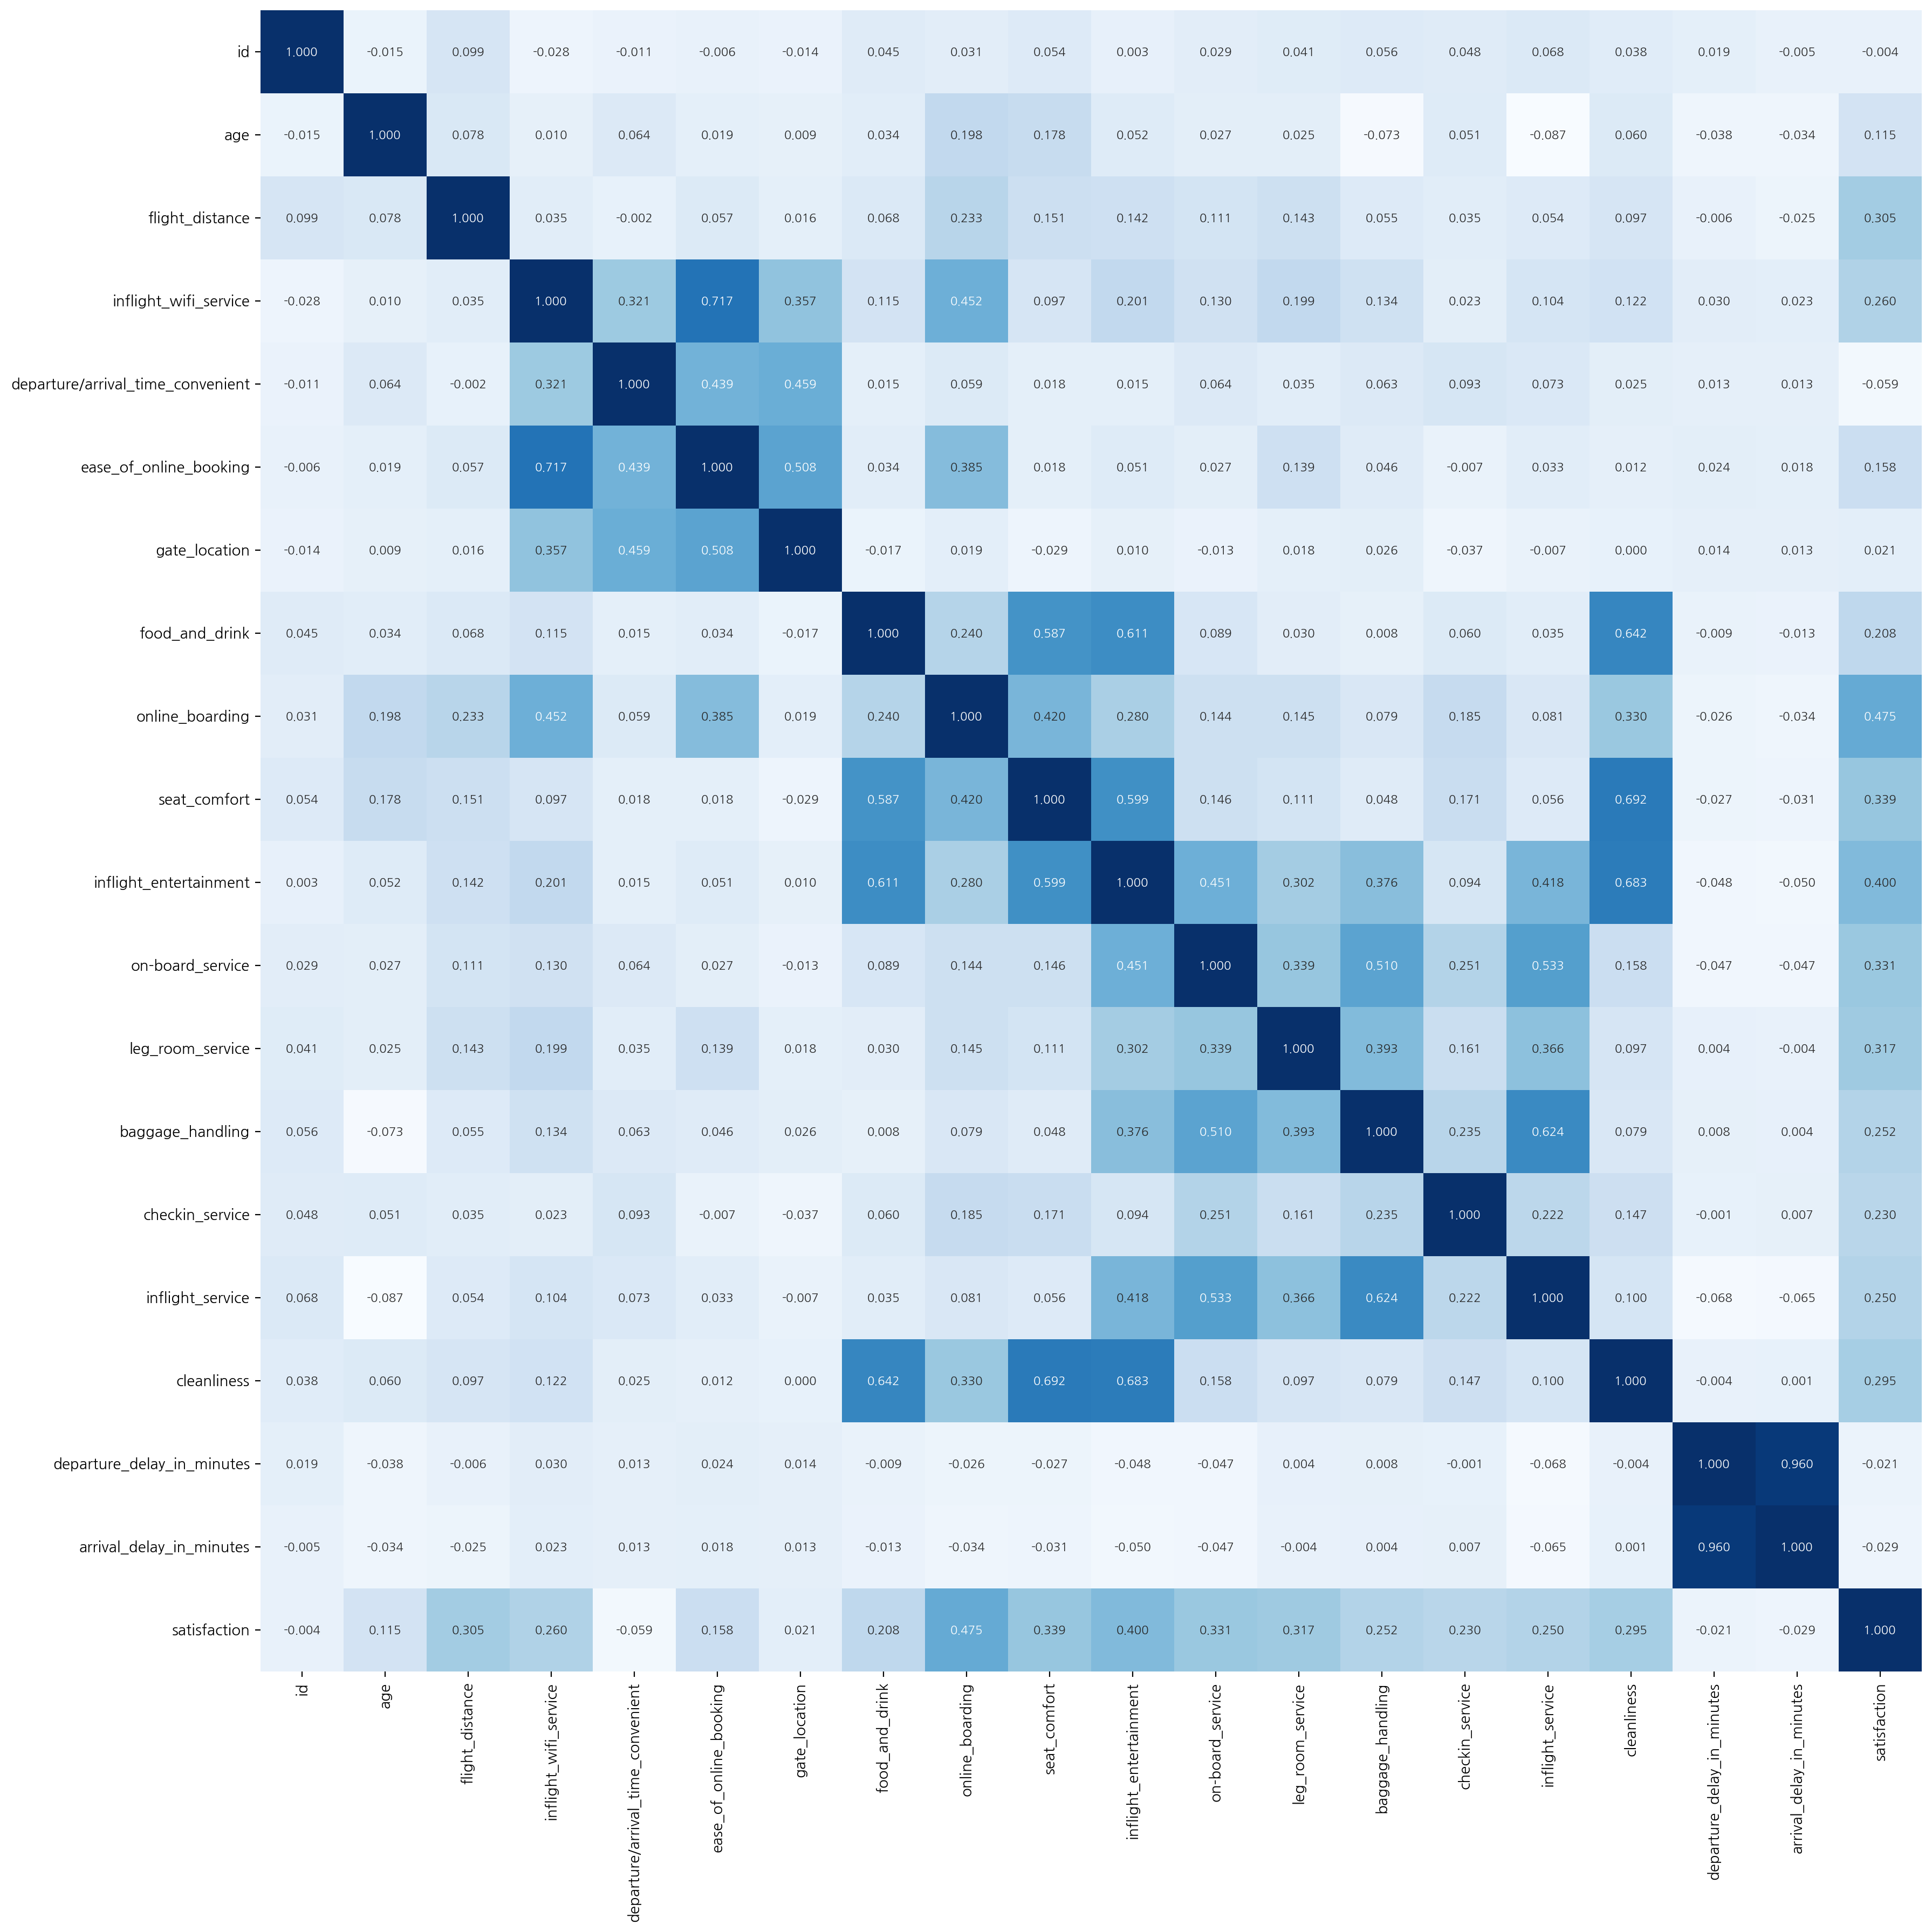

In [77]:
# 숫자 이변량
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(numeric_only=True),
            annot=True,
            cmap='Blues',
            cbar=False,
            square=True,
            fmt='.3f',
            annot_kws={'size': 8})

plt.show()

In [78]:
import scipy.stats as spst

# 함수 만들기
def top_correlations(dataframe:pd.DataFrame, target, consider_pVal = False, only_strong = False):
    result = []
    # print(dataframe.columns)
    for i in dataframe.columns:
        if i==target or not pd.api.types.is_numeric_dtype(dataframe[i]):
            continue
        
        if dataframe[i].nunique() <= 1 or dataframe[target].nunique() <= 1:
            continue
        
        try:
            corr, p_val = spst.pearsonr(dataframe[target], dataframe[i])
        except Exception as e:
            print(f"Pearson 계산 중 오류 발생: {e}")
            continue   
        
        
        p_condition = True
        strong_condition = True
        
        if consider_pVal:
            p_condition = p_val < 0.05
            
        if only_strong:
            strong_condition = corr>0.1
        
        if p_condition and strong_condition:
            # print('im in!')
            result.append((corr, p_val, i))
    return sorted(result, reverse=True)

def scatterplot(dataframe:pd.DataFrame, x ,target):
    plt.figure(figsize=(12,4))
    # plt.title(target)
    plt.subplot(1,2,1)
    sns.scatterplot(data=dataframe, x=x,y=target)
    plt.xticks(rotation=45)
    # sns.lineplot(data=dataframe, x=x,y=target)
    
    plt.subplot(1,2,2)
    sns.boxplot(x=target, data=data)
    plt.xticks(rotation=45)
    plt.show()
    
    sns.lmplot(data=dataframe, x=x,y=target)
    plt.show()


In [79]:
# 기내 엔터가 은근 높음. 정규화 후 다시 보자.
# 온라인 보딩 만족도와 상관관계가 제일 높음.
for i in top_correlations(data, target, True, True):
    try:
        print(f'{i[2]} , corr : {i[0]}, p-val : {i[1]}')
    except Exception as e:
        print(f'{i}는 상관분석 불가 \n{i}')

Pearson 계산 중 오류 발생: array must not contain infs or NaNs
online_boarding , corr : 0.47544668624459113, p-val : 1.1744611677730261e-145
inflight_entertainment , corr : 0.3997012655503226, p-val : 1.4087290444876367e-99
seat_comfort , corr : 0.3387731106340555, p-val : 2.6433804165035695e-70
on-board_service , corr : 0.33070738857455495, p-val : 6.869837431494177e-67
leg_room_service , corr : 0.31679482804305326, p-val : 3.085000160090761e-61
flight_distance , corr : 0.305259583683716, p-val : 8.964828193353918e-57
cleanliness , corr : 0.29492327422162823, p-val : 6.08210658782312e-53
inflight_wifi_service , corr : 0.2598745902077644, p-val : 4.321761273945699e-41
baggage_handling , corr : 0.2520133817492465, p-val : 1.1468143673809653e-38
inflight_service , corr : 0.2503363394630928, p-val : 3.679006121688416e-38
checkin_service , corr : 0.23048327220941037, p-val : 1.8764974003916023e-32
food_and_drink , corr : 0.20803673284412455, p-val : 1.2781069634142347e-26
ease_of_online_booking ,

In [80]:
# 정규화 후 위 친구들만 포함한 것과
# 위 친구들 + 지연시간 두개를 테스트

In [81]:
# 함수 만들기
def targetPerCategory(dataframe:pd.DataFrame, x ,target):
    plt.figure(figsize=(12,4))
    # plt.title(target)
    # plt.subplot(1,2,1)
    sns.barplot(data=dataframe, x=x,y=target)
    plt.xticks(rotation=45)
    
    print('ANOVA 분석')
    x_keys = dataframe.groupby(by=x)
    target_per_xVars = [j[target] for i,j in x_keys]
    print(spst.f_oneway(*target_per_xVars))

ANOVA 분석
F_onewayResult(statistic=1.881246462772125, pvalue=0.1703119045832443)
ANOVA 분석
F_onewayResult(statistic=90.23388876344426, pvalue=4.656652903395355e-21)
ANOVA 분석
F_onewayResult(statistic=690.9475877950238, pvalue=4.0265198916772455e-135)
ANOVA 분석
F_onewayResult(statistic=422.3510812083506, pvalue=2.237938353240231e-159)


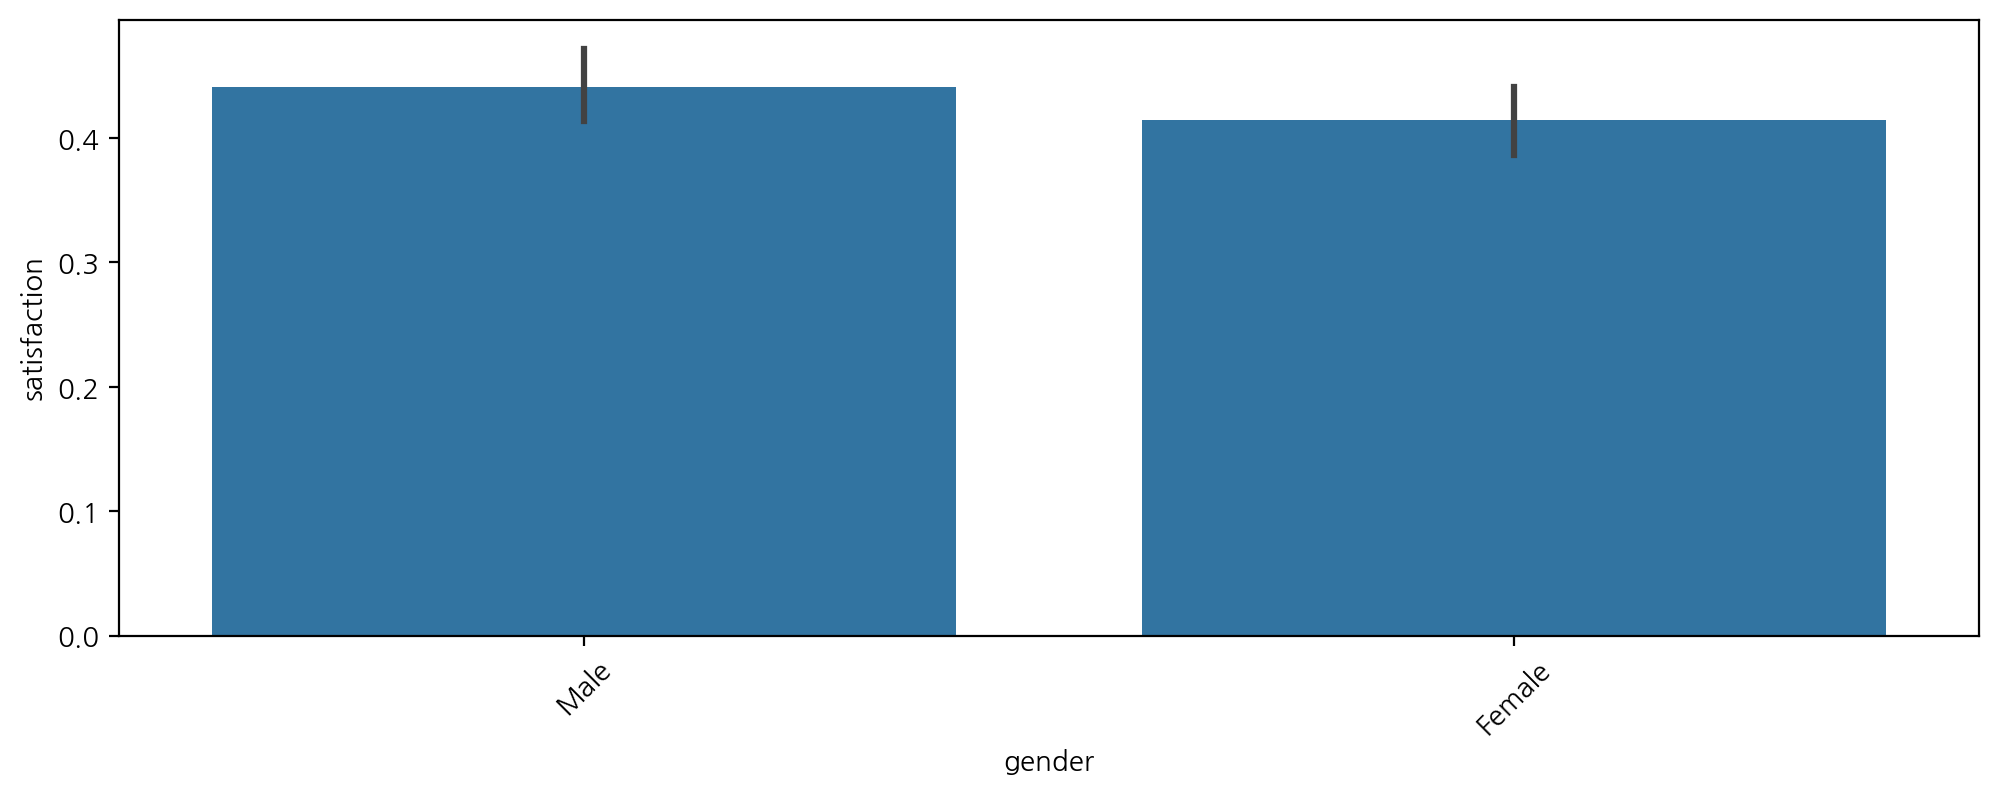

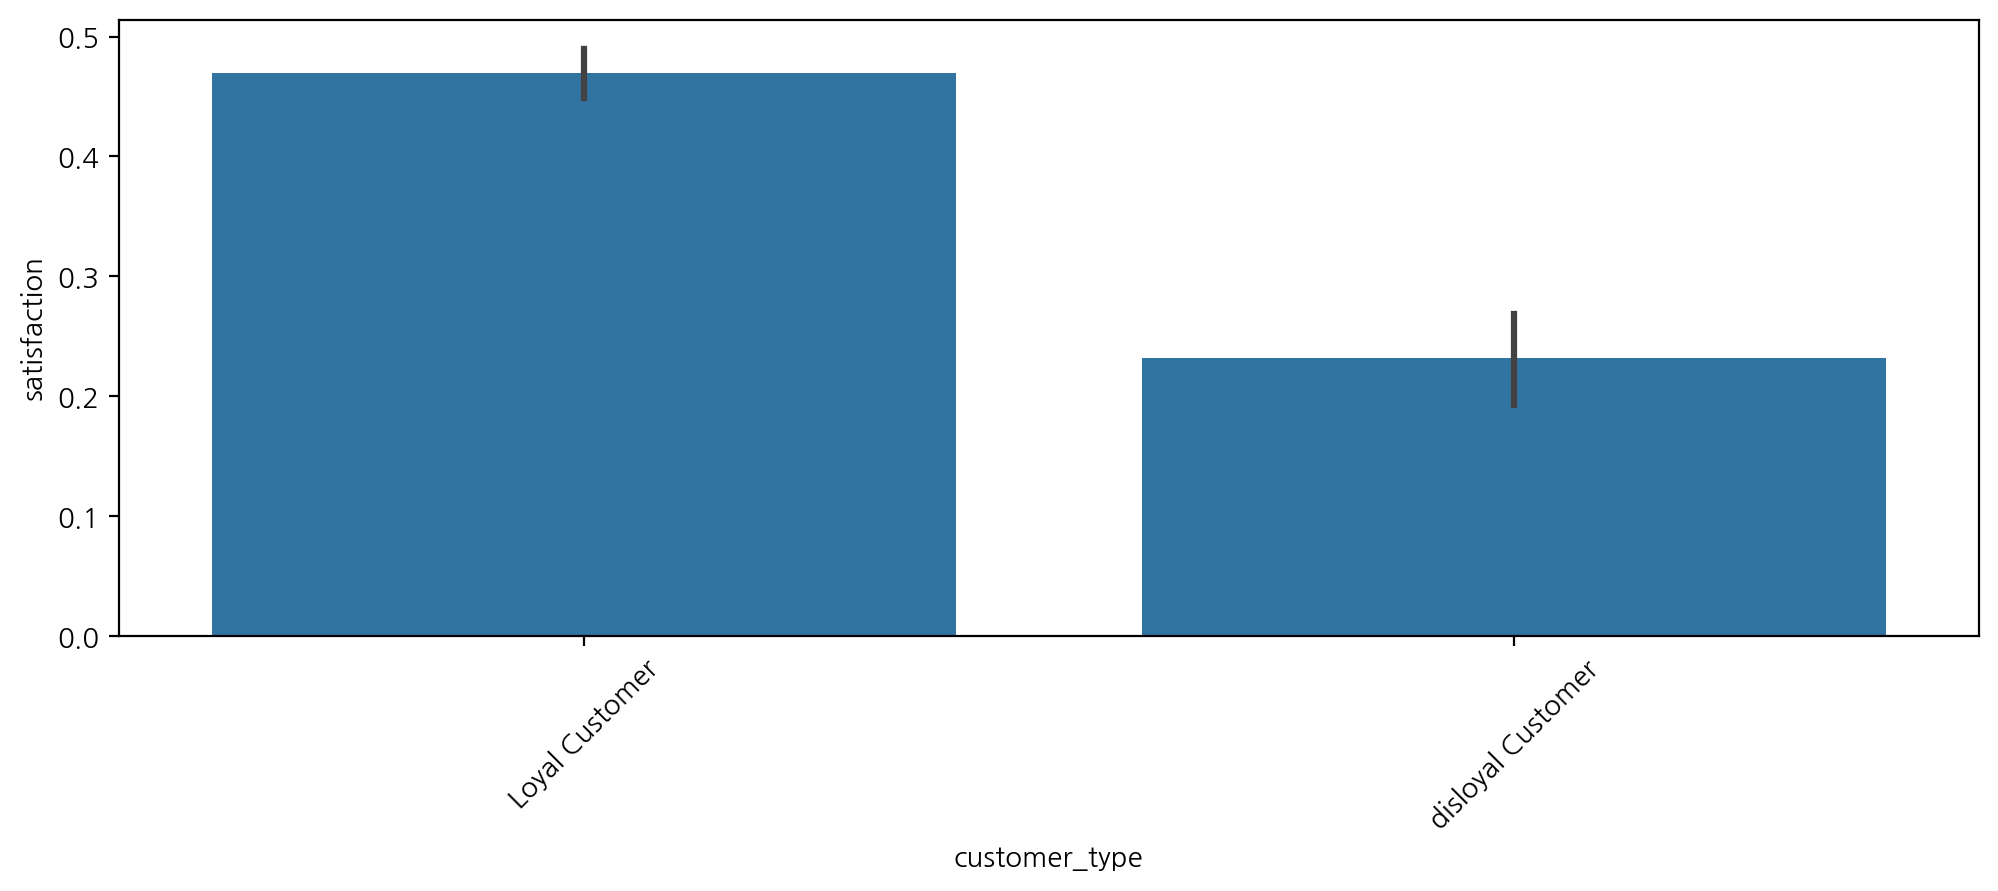

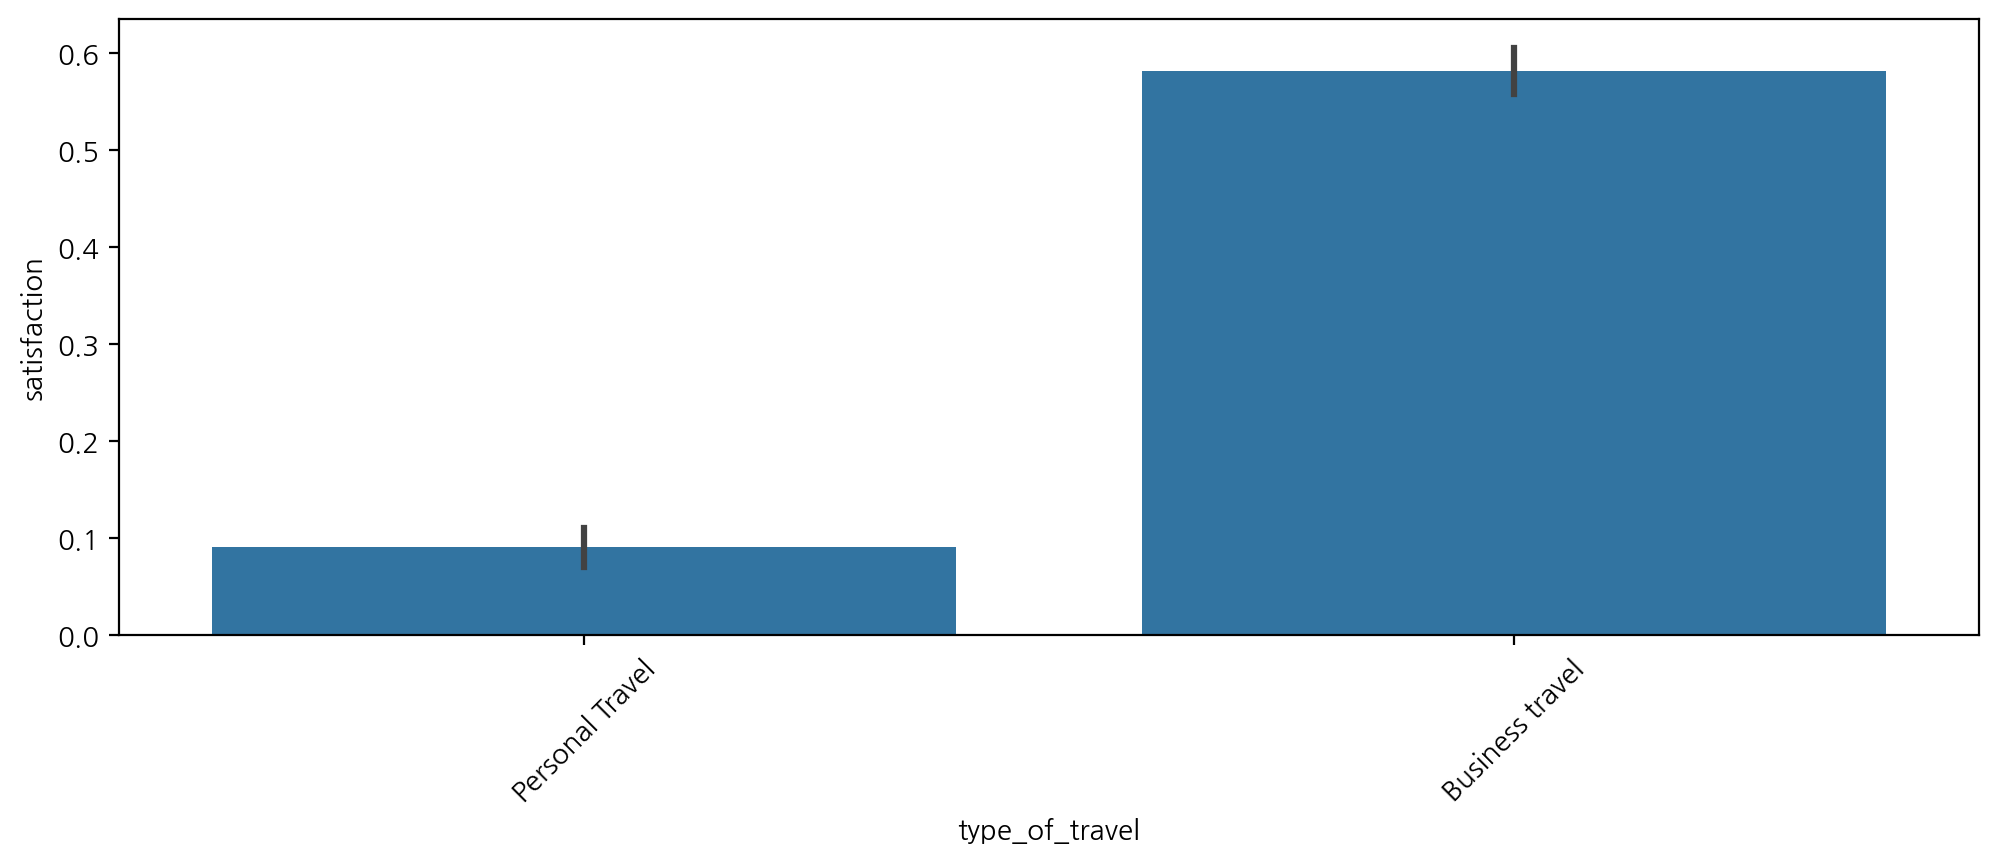

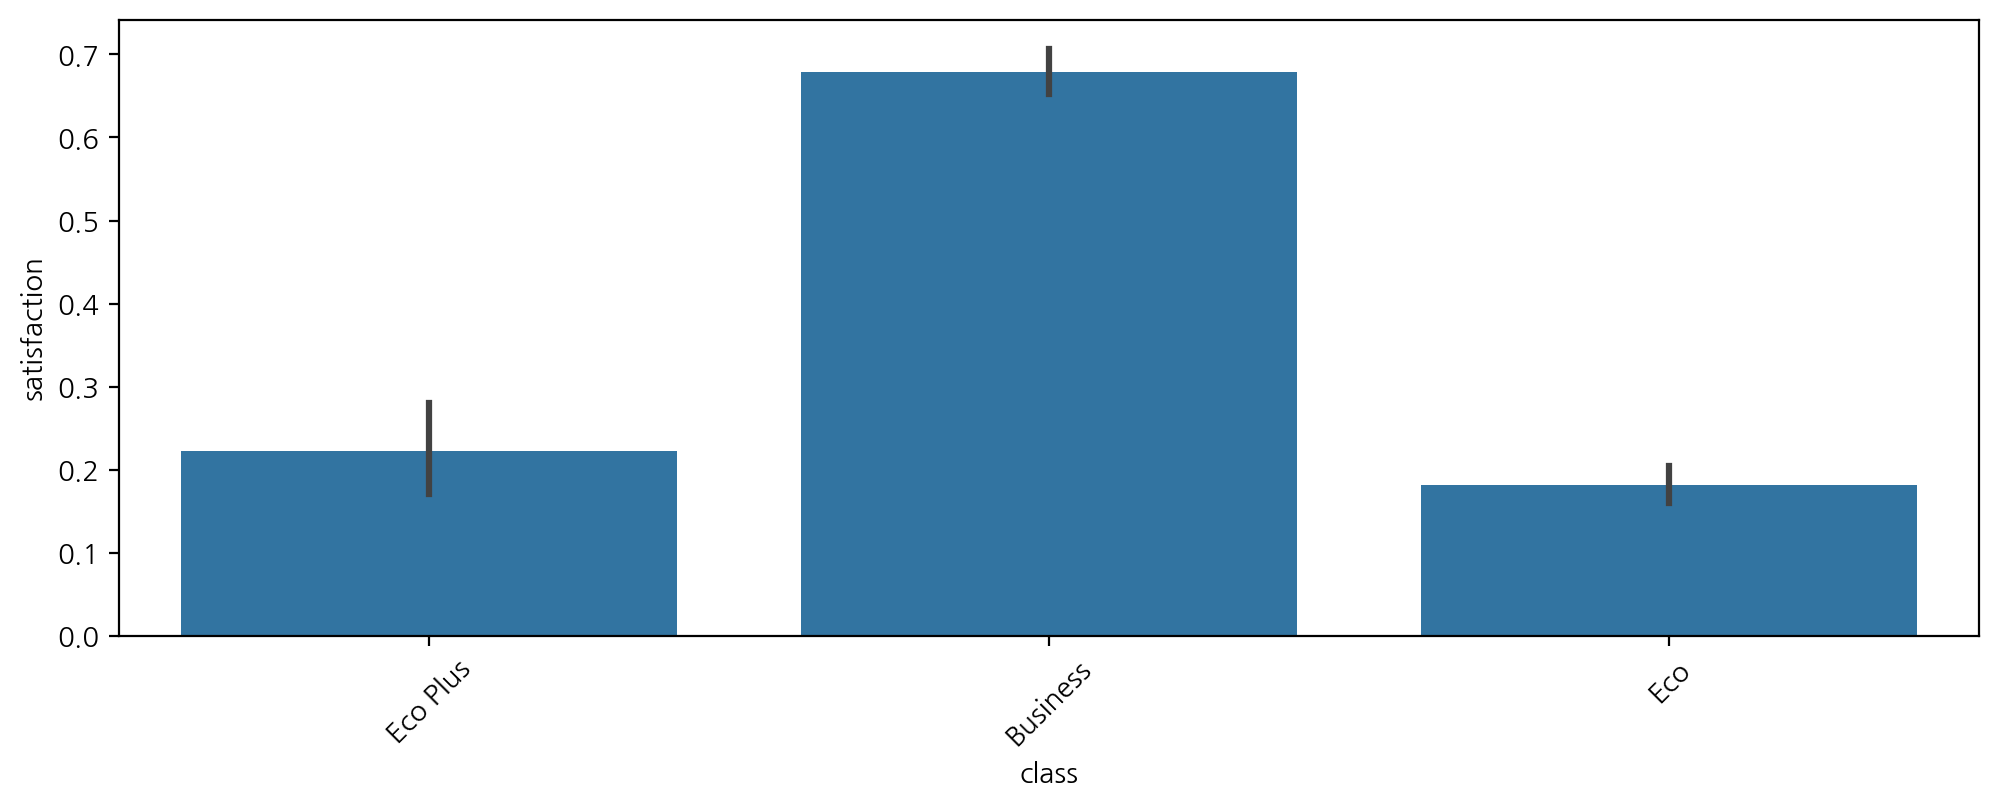

In [82]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

for i in categorical_columns:
    targetPerCategory(data,i,target)

In [83]:
# 남녀 제외하고는 모두 분포차이가 존재
# 일단 죄다 더미화.

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 변수 제거**

In [84]:
# id, departure/arrival_time_convenient, gate_location, departure_delay_in_minutes
# 지연시간 두 종류는 corr이 매우 높음.
# 다중 공선성 문제 방지를 위하여 제거.
data.drop(columns=['id', 'departure/arrival_time_convenient', 'gate_location', 'departure_delay_in_minutes'], inplace=True)
data.columns

Index(['gender', 'customer_type', 'age', 'type_of_travel', 'class',
       'flight_distance', 'inflight_wifi_service', 'ease_of_online_booking',
       'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'arrival_delay_in_minutes', 'satisfaction'],
      dtype='object')

**2) 결측치 제거**

In [85]:
# 없었음.
data = data.interpolate(method='linear')


**3) x, y 분리**

In [86]:
x = data.drop(columns=[target])
y = data[target]

**4) 가변수화**

In [87]:
x = pd.get_dummies(x, drop_first=True)
x.columns

Index(['age', 'flight_distance', 'inflight_wifi_service',
       'ease_of_online_booking', 'food_and_drink', 'online_boarding',
       'seat_comfort', 'inflight_entertainment', 'on-board_service',
       'leg_room_service', 'baggage_handling', 'checkin_service',
       'inflight_service', 'cleanliness', 'arrival_delay_in_minutes',
       'gender_Male', 'customer_type_disloyal Customer',
       'type_of_travel_Personal Travel', 'class_Eco', 'class_Eco Plus'],
      dtype='object')

**5) 학습용, 평가용 데이터 분리**

In [88]:
# 추후 아래 함수를 호출하여 데이터를 분리
def get_datas(x, y):
    z_scaler = StandardScaler()
    minmax_scaler = MinMaxScaler()
    
    # 데이터셋 분할
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
    
    # 데이터프레임 형태 유지
    x_train = pd.DataFrame(x_train, columns=x.columns)
    x_test = pd.DataFrame(x_test, columns=x.columns)
    
    # Min-Max 정규화 후 DataFrame으로 변환
    x_train_m = pd.DataFrame(minmax_scaler.fit_transform(x_train), columns=x.columns)
    x_test_m = pd.DataFrame(minmax_scaler.transform(x_test), columns=x.columns)

    # Z-정규화 후 DataFrame으로 변환
    x_train_z = pd.DataFrame(z_scaler.fit_transform(x_train), columns=x.columns)
    x_test_z = pd.DataFrame(z_scaler.transform(x_test), columns=x.columns)

    # 개별적으로 반환
    return x_train, x_test, x_train_m, x_test_m, x_train_z, x_test_z, y_train, y_test


**6) 정규화**

In [89]:
# 위 함수에서 정규화까지 수행.

# 4.성능 예측

- 여러 알고리즘으로 만든 모델의 성능을 교차 검증을 통해 예측해 봅니다.
- 하이퍼파라미터를 설정하지 않고 진행합니다.
- 예측된 성능 정보를 수집해 마지막에 비교합니다.

In [90]:
# xgboost 설치
# !pip install xgboost

In [91]:
# lightgbm 설치
# !pip install lightgbm

- 이후 사용할 함수를 모두 불러옵니다.

In [92]:
from sklearn.neighbors import KNeighborsRegressor

# 여러가지 모델에 대해서 모두 실험을 돌리고 성능 테스트를 진행하기 위해 한꺼번에 선언함.
models = [
    GradientBoostingRegressor(),
    RandomForestRegressor(),
    LinearRegression(),
    DecisionTreeRegressor(),
    XGBRegressor(),
    LGBMRegressor(),
    KNeighborsRegressor(),
]

In [93]:
# 하이퍼 파라미터 그리드
param_grids = {
    'GradientBoostingRegressor': {'n_estimators': [1, 100], 'learning_rate': [0.01, 0.02]},
    'SVR': {'C': [0.1, 1], 'kernel': ['linear']},
    'RandomForestRegressor': {'n_estimators': [1, 100], 'max_depth': [10, 20, None]},
    'LinearRegression': {},  # LinearRegression은 기본 파라미터로 사용
    'ExtraTreesRegressor': {'n_estimators': [1, 100], 'max_depth': [10, 20, None]},
    'AdaBoostRegressor': {'n_estimators': [1, 100], 'learning_rate': [0.01, 0.-1]},
    'DecisionTreeRegressor': {'max_depth': [10, 20, None]},
    'XGBRegressor': {'n_estimators': [1, 100], 'learning_rate': [0.01, 0.02]},
    'XGBRFRegressor': {'n_estimators': [1, 100], 'learning_rate': [0.01, 0.02]},
    'LGBMRegressor' : {'n_estimators': [1, 100], 'learning_rate': [0.01, 0.02]},
    'KNeighborsRegressor' : {}
}

In [94]:
def plot_predict_actual(pred, actual ,model_name, save_dir):
    plt.figure(figsize=(10, 6))
    plt.title(f"Feature Importance : {model_name}")
    plt.xticks(rotation=90)
    plt.plot(list(pred), label='pred')
    plt.plot(list(actual), label='Actual')
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"{model_name}_predict.png"))
    plt.close()
    
def plot_feature_importance(model, x_col,x_shape, model_name, save_dir):
    save_dir = os.path.join(path, save_dir)
    
    try:
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]

        plt.figure(figsize=(10, 6))
        plt.title(f"Feature Importance : {model_name}")
        plt.bar(range(x_shape[1]), importances[indices], align='center')
        plt.xticks(range(x_shape[1]), x_col[indices], rotation=90)
        plt.tight_layout()
        plt.savefig(os.path.join(save_dir, f"{model_name}_feature_importance.png"))
        plt.close()
    except AttributeError:
        if hasattr(model, 'coef_'):
            importances = np.abs(model.coef_)
            indices = np.argsort(importances)[::-1]

            plt.figure(figsize=(10, 6))
            plt.title(f"Coefficient : {model_name}")
            plt.bar(range(x_shape[1]), importances[indices], align='center')
            plt.xticks(range(x_shape[1]), x_col[indices], rotation=90)
            plt.tight_layout()
            plt.savefig(os.path.join(save_dir, f"{model_name}_coefficient.png"))
            plt.close()
        else:
            print(f"{model_name} has no feature importances or coefficients.")

In [95]:
# ====================
# train pipeline 함수
# ====================
def train(save_dir, x_train, y_train, x_test, y_test):
    if not os.path.exists(save_dir):
        os.mkdir(save_dir)
    log_file = open(os.path.join(save_dir, "model_training_log.txt"), "w")

    models = [
        GradientBoostingRegressor(),
        RandomForestRegressor(),
        LinearRegression(),
        DecisionTreeRegressor(),
        XGBRegressor(),
        LGBMRegressor(verbose=-1),
    ]

    results = {
        'Model_Name': [],
        'R2_score': [],
        'RMSE': [],
        'NMAE': [],
        'Best_Params': [],
        'Predict' : []
    }

    for model in models:
        model_name_current = model.__class__.__name__

        param_grid = param_grids.get(model_name_current, {})

        search = search = RandomizedSearchCV(model, param_distributions=param_grid, cv=3, n_jobs=-1, n_iter=5)
        log_file.write(f"Searching best hyperparameters for {model_name_current}\n")
        search.fit(x_train, y_train)
        best_model = search.best_estimator_
        best_params = search.best_params_

        log_file.write(f"Training {model_name_current}\n")

        y_pred = best_model.predict(x_test)

        r2 = r2_score(y_test, y_pred) * 100
        rmse_value = mean_squared_error(y_test, y_pred, squared=False)
        mae = mean_absolute_error(y_test, y_pred)
        nmae_value = mae / y_test.mean()

        results['Model_Name'].append(model_name_current)
        results['R2_score'].append(r2)
        results['RMSE'].append(rmse_value)
        results['NMAE'].append(nmae_value)
        results['Best_Params'].append(best_params)
        results['Predict'].append(y_pred)

        joblib.dump(search, os.path.join(save_dir, f'{model_name_current}.pkl'))
        
        plot_predict_actual(y_pred, y_test, model_name_current, save_dir)

        log_file.write(f"R2 Score: {r2:.2f}\n")
        log_file.write(f"RMSE: {rmse_value:.2f}\n")
        log_file.write(f"NMAE: {nmae_value:.4f}\n")
        log_file.write(f"Best Hyperparameters: {best_params}\n\n")

        # def plot_feature_importance(model, x_col, x_shape, model_name, save_dir):

        plot_feature_importance(best_model, x_train.columns, x_train.shape, model_name_current,save_dir)

    results_df = pd.DataFrame(results)

    results_df.to_csv(os.path.join(save_dir, "model_scores.csv"), index=False)

    log_file.close()

# 5.결과 확인

- 예측된 각 모델의 성능을 비교합니다.

In [96]:
high_corr = list(top_correlations(data, target, True, True))
labels = [item[2] for item in high_corr]
labels.extend(['gender_Male', 'customer_type_disloyal Customer',
       'type_of_travel_Personal Travel', 'class_Eco', 'class_Eco Plus'])

# print(high_corr)
x_dict = {'original' : x,
          'only_high_corr' : x[labels],
          'drop_arrival_delay_in_minutes' : x.drop(columns=['arrival_delay_in_minutes'], axis=1)
    }

In [101]:
x_dict = {'original' : x,
          'only_high_corr' : x[labels],
          'drop_arrival_delay_in_minutes' : x.drop(columns=['arrival_delay_in_minutes'], axis=1)
    }

In [ ]:
# 가설 
# 지연도가 만족도에 높은 영향을 줄것으로 판단되기에, 저 차이를 꼭 들고갈것임.
# 지연도의 이상치가 높기에 z-정규화가 제일 잘 먹힐 것.
# y는 숫자지만, 사실상 범주이므로 분기를 나눌 수 있는 트리형 모델이 웬만한 회귀모델보다 좋을 것.

In [102]:
for key in x_dict.keys():
    # if key == 'original' and key == 'only_high_corr':
    #     continue
    # 데이터 분리
    x_train, x_test, x_train_m, x_test_m, x_train_z, x_test_z, y_train, y_test = get_datas(x_dict[key], y)

    # 결측치 확인
    # print(x_train.isna().sum())
    # print(x_train_m.isna().sum())
    # print(x_train_z.isna().sum())

    # ====================
    # 정규화 없는 데이터
    # ====================
    save_dir = os.path.join(path, f'test/{key}_General_testBaseline/')
    train(save_dir, x_train, y_train, x_test, y_test)

    # ====================
    # Min-Max 정규화
    # ====================
    save_dir = os.path.join(path, f'test/{key}_General_m_testBaseline/')
    train(save_dir, x_train_m, y_train, x_test_m, y_test)

    # ====================
    # z-정규화
    # ====================
    save_dir = os.path.join(path, f'test/{key}_General_z_testBaseline/')
    train(save_dir, x_train_z, y_train, x_test_z, y_test)


In [106]:
import glob

csv_files = glob.glob(os.path.join(path+'/test', '**', '*.csv'), recursive=True)

total_res_df = pd.DataFrame()

for i,j in enumerate(csv_files):
    res_df=pd.read_csv(j)
    res_df['foldername'] = os.path.basename(os.path.dirname(j))
    total_res_df = pd.concat([total_res_df,res_df])
    
total_res_df.sort_values(by='R2_score', ascending=False, inplace=True)
total_res_df.head()

,Model_Name,R2_score,RMSE,NMAE,Best_Params,Predict,foldername
1,RandomForestRegressor,82.205605,0.209004,0.233642,"{'n_estimators': 100, 'max_depth': 20}",[0.34 1. 0.04 0.01 0.82 0.01 1. 1. 0.01 ...,only_high_corr_General_testBaseline
1,RandomForestRegressor,82.188938,0.209102,0.232868,"{'n_estimators': 100, 'max_depth': 10}",[4.22018177e-01 9.93343135e-01 4.90000000e-02 ...,only_high_corr_General_m_testBaseline
1,RandomForestRegressor,81.952258,0.210487,0.229418,"{'n_estimators': 100, 'max_depth': 20}",[0.44 0.99 0.05 0.01 0.82 0. 1. 1. ...,only_high_corr_General_z_testBaseline
1,RandomForestRegressor,80.282222,0.221664,0.232986,"{'n_estimators': 100, 'max_depth': None}",[0. 0.94 0.83 0.02 0.25 0.96 0.01 0.97 0.8 ...,original_General_m_testBaseline
1,RandomForestRegressor,80.074156,0.222831,0.234195,"{'n_estimators': 100, 'max_depth': 10}",[0.00000000e+00 9.27172021e-01 7.75809663e-01 ...,original_General_testBaseline


In [108]:
total_res_df

,Model_Name,R2_score,RMSE,NMAE,Best_Params,Predict,foldername
1,RandomForestRegressor,82.205605,0.209004,0.233642,"{'n_estimators': 100, 'max_depth': 20}",[0.34 1. 0.04 0.01 0.82 0.01 1. 1. 0.01 ...,only_high_corr_General_testBaseline
1,RandomForestRegressor,82.188938,0.209102,0.232868,"{'n_estimators': 100, 'max_depth': 10}",[4.22018177e-01 9.93343135e-01 4.90000000e-02 ...,only_high_corr_General_m_testBaseline
1,RandomForestRegressor,81.952258,0.210487,0.229418,"{'n_estimators': 100, 'max_depth': 20}",[0.44 0.99 0.05 0.01 0.82 0. 1. 1. ...,only_high_corr_General_z_testBaseline
1,RandomForestRegressor,80.282222,0.221664,0.232986,"{'n_estimators': 100, 'max_depth': None}",[0. 0.94 0.83 0.02 0.25 0.96 0.01 0.97 0.8 ...,original_General_m_testBaseline
1,RandomForestRegressor,80.074156,0.222831,0.234195,"{'n_estimators': 100, 'max_depth': 10}",[0.00000000e+00 9.27172021e-01 7.75809663e-01 ...,original_General_testBaseline
1,RandomForestRegressor,80.047407,0.222980,0.236575,"{'n_estimators': 100, 'max_depth': None}",[0. 0.95 0.76 0.03 0.17 0.98 0.01 0.98 0.7 ...,original_General_z_testBaseline
3,DecisionTreeRegressor,77.597531,0.234510,0.160689,{'max_depth': 10},[0. 1. 0. 0. 0...,only_high_corr_General_m_testBaseline
1,RandomForestRegressor,77.096356,0.238132,0.269543,"{'n_estimators': 100, 'max_depth': 10}",[2.16666667e-02 1.57230794e-01 1.01753584e-01 ...,drop_arrival_delay_in_minutes_General_m_testBa...
5,LGBMRegressor,77.009692,0.237567,0.379403,"{'n_estimators': 100, 'learning_rate': 0.02}",[0.40034704 0.91206819 0.14623055 0.06216507 0...,only_high_corr_General_z_testBaseline
4,XGBRegressor,77.005164,0.237590,0.385024,"{'n_estimators': 100, 'learning_rate': 0.02}",[0.4461457 0.9235359 0.15836884 0.08957431 0...,only_high_corr_General_m_testBaseline


In [ ]:
# 트리가 우세한건 맞으나, 원본일때의 정규화 없는 데이터가 가장 우세
# 

# 6.성능 튜닝

- 위에서 성능이 가장 좋을 것으로 예측된 알고리즘으로 모델링합니다.
- 본 실습에서는 하이퍼파라미터가 최적화된 LightGBM 모델을 만듭니다.
- joblib.dump() 함수를 사용해 모델을 파일로 저장합니다.

# 7.성능 평가

- 최적 파라미터로 학습된 모델에 대해 최종 성능 평가를 진행합니다.

In [107]:

from sklearn.metrics import classification_report

x_train, x_test, x_train_m, x_test_m, x_train_z, x_test_z, y_train, y_test = get_datas(x_dict['only_high_corr'], y)

model_path = os.path.join(path, f'test/only_high_corr_General_testBaseline/RandomForestRegressor.pkl')
loaded_model = joblib.load(model_path)

predicted = loaded_model.predict(x_test)

# 확인
# print(predicted)
# 방금 추가
print(classification_report(np.where(predicted > 0.5, 1, 0),y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       452
           1       0.97      0.98      0.97       322

    accuracy                           0.98       774
   macro avg       0.98      0.98      0.98       774
weighted avg       0.98      0.98      0.98       774

